# Business Understanding

## Latar belakang
TokoGenZ adalah marketplace baru yang menawarkan berbagai produk dari berbagai penjual. Dengan pertumbuhan jumlah produk yang terdaftar, TokoGenZ menghadapi masalah signifikan dalam hal pengalaman pengguna. Pengguna mengalami kesulitan dalam menemukan barang yang mereka cari karena kurangnya sistem pengelompokan yang jelas. Data yang tersedia saat ini hanya mencakup informasi dasar seperti judul produk, jumlah terjual, lokasi penjual, harga, dan rating, tanpa adanya struktur kategori yang memadai. Hal ini menyebabkan pengguna harus melakukan pencarian yang melelahkan dan tidak efisien, berpotensi mengurangi minat mereka terhadap platform.

## Masalah yang Dihadapi
Pengalaman pencarian yang buruk dapat berdampak negatif pada kepuasan pengguna dan tingkat retensi pelanggan. Misalnya, seorang pembeli yang ingin mencari produk elektronik harus melewati berbagai kategori produk lain yang tidak relevan, membuat proses pencarian menjadi tidak efisien. Situasi ini menunjukkan perlunya pengelompokan produk yang lebih baik untuk memudahkan pengguna dalam menemukan barang yang mereka cari.

## Tujuan Pengelompokan
TokoGenZ menyadari bahwa pengelompokan produk sangat penting untuk meningkatkan aksesibilitas bagi pengguna dan memenuhi kebutuhan analitik data produk. Namun, tantangan yang dihadapi adalah menentukan jumlah kategori yang diperlukan dan kategori mana yang paling relevan untuk produk-produk tersebut. Oleh karena itu, pengelompokan produk yang tepat sangat krusial untuk membantu pengguna menemukan barang dengan cepat dan efisien.

## Manfaat Pengelompokan
Dengan menerapkan sistem pengelompokan yang efektif, TokoGenZ dapat:
- **Meningkatkan Pengalaman Pengguna**: Memudahkan pengguna dalam mencari dan menemukan produk yang diinginkan tanpa harus melalui banyak kategori.
- **Memberikan Rekomendasi Produk**: Menggunakan data pengelompokan untuk memberikan rekomendasi produk yang lebih sesuai dengan preferensi pengguna.
- **Analisis Data Produk**: Memungkinkan TokoGenZ untuk menganalisis data penjualan dan tren produk berdasarkan kategori, sehingga dapat mengambil keputusan strategis untuk pengembangan bisnis.

## Dataset
Dataset utama yang digunakan pada Tahap Final Hology Data Mining Competition 2024 terdiri dari 933.985 informasi produk.

In [1]:
# %pip install -r requirements.txt

## Import Library

In [1]:
import os
import pandas as pd
import regex as re
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
import string

import stanza
stanza.download('id')
stanza.download('en')
nlp = stanza.Pipeline(lang='id', processors='tokenize,pos', use_gpu=True)
nlp_en = stanza.Pipeline(lang='en', processors='tokenize,pos', use_gpu=True)

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

c:\Users\User\Documents\Code\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-24 14:12:59 INFO: Downloading default packages for language: id (Indonesian) ...
2024-12-24 14:13:00 INFO: File exists: C:\Users\User\stanza_resources\id\default.zip
2024-12-24 14:13:02 INFO: Finished downloading models and saved to C:\Users\User\stanza_resources.
2024-12-24 14:13:03 INFO: Downloading default packages for language: en (English) ...
2024-12-24 14:13:04 INFO: File exists: C:\Users\User\stanza_resources\en\default.zip
2024-12-24 14:13:08 INFO: Finished downloading models and saved to C:\Users\User\stanza_resources.
2024-12-24 14:13:08 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REU

In [9]:
df = pd.read_csv("data/Hology_final_dataset.csv", sep=';')
df.head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,Rp167.500,NaN,NaN,NaN
1,Terbatas Sewa Global Travel Wifi Middle East A...,Rp207.110,NaN,NaN,NaN
2,paper bowl 650 ml rice bowl 22 oz star pack ma...,Rp725,Bandung,5.0,10rb+ terjual
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,Rp191.000,NaN,NaN,NaN
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,Rp379.000,NaN,NaN,NaN


 Based on the first five rows of data, we can see that the "price" column still has the format "Rp" and the "sold" column data is described using the "rb" format. We need to transform this data into appropriate values

### Dataset Overview

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933985 entries, 0 to 933984
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      933915 non-null  object 
 1   price     933915 non-null  object 
 2   location  603604 non-null  object 
 3   rating    526449 non-null  float64
 4   sold      524253 non-null  object 
dtypes: float64(1), object(4)
memory usage: 35.6+ MB


Based on this overview, we can see that all columns have null values. Additionally, some columns have data types that are not appropriate; for example, the columns "price" and "sold" should be numeric instead of object.

### Dataset Description

In [11]:
# numeric column
df.describe()

,rating
count,526449.000000
mean,4.905042
std,0.180308
min,1.000000
25%,4.900000
50%,5.000000
75%,5.000000
max,5.000000


In [12]:
# object column
df.describe(include="object")

,name,price,location,sold
count,933915,933915,603604,524253
unique,806103,60564,515,55
top,IPI VITAMIN A BOTOL 45 TABLET,Rp35.000,Jakarta Barat,100+ terjual
freq,99,10552,114083,73266


### Data Transform and Handling Missing Values

#### Price Column

In [13]:
# extract value from price column that is not number
def extract_prefix(text):
    if pd.isna(text): # handle null value
        return None
    match = re.match(r'([A-Za-z]+)', text)
    return match.group(1) if match else None

prefix = df['price'].apply(extract_prefix)
unique_prefixes = prefix.unique()
unique_prefixes

array(['Rp', None], dtype=object)

In [14]:
# delete prefix from price column
def extract_price(text):
    if pd.isna(text): # handle null value
        return None
    return ''.join(re.findall(r'\d+', str(text)))

df['price'] = df['price'].apply(extract_price)
df['price'] = pd.to_numeric(df['price'], errors='coerce') # convert to numeric

In [15]:
# check if there is any null value in price column
df['price'].isna().sum()

np.int64(70)

There are 70 null values in the 'price' column.

In [16]:
# description "price" column
df['price'].describe()

count    9.339150e+05
mean     6.377056e+05
std      3.610334e+06
min      1.000000e+02
25%      2.900000e+04
50%      8.000000e+04
75%      2.323550e+05
max      3.500000e+08
Name: price, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "price" column, we will use "0".

In [17]:
# fill null value in price column with 0
df.fillna({"price": 0}, inplace=True)

# check if the null value in price column has been filled
df['price'].isna().sum()

np.int64(0)

In [18]:
# check price column after filling null value with 0
df[df['price'] == 0].head()

,name,price,location,rating,sold
12988,NaN,0.0,NaN,NaN,NaN
14629,NaN,0.0,NaN,NaN,NaN
30278,NaN,0.0,NaN,NaN,NaN
45384,NaN,0.0,NaN,NaN,NaN
47969,NaN,0.0,NaN,NaN,NaN


We will perform a similar method for the "sold" column.

In [19]:
df.head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,167500.0,NaN,NaN,NaN
1,Terbatas Sewa Global Travel Wifi Middle East A...,207110.0,NaN,NaN,NaN
2,paper bowl 650 ml rice bowl 22 oz star pack ma...,725.0,Bandung,5.0,10rb+ terjual
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,191000.0,NaN,NaN,NaN
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,379000.0,NaN,NaN,NaN


#### Sold Column

In [20]:
# extract pattern from sold column that is not number
def extract_sold_pattern(text):
    if pd.isna(text): # handle null value
        return None
    match = re.findall(r'[^\d]+', text)
    return ''.join(match) if match else None

pattern = df['sold'].apply(extract_sold_pattern)
unique_pattern = pattern.unique()
unique_pattern

array([None, 'rb+ terjual', '+ terjual', ' terjual', 'jt+ terjual'],
      dtype=object)

In [21]:
print(df['sold'].iloc[22967])
print(df['sold'].iloc[83])

1jt+ terjual
1rb+ terjual


In [22]:
# delete pattern from sold column
def extract_sold(s):
    if pd.isna(s):
        return None
    s = str(s).lower().replace('rb', '000').replace('jt', '000000')
    s = re.sub(r'[^\d]', '', s)
    return int(s) if s.isdigit() else None

df['sold'] = df['sold'].apply(extract_sold)
df['sold'] = pd.to_numeric(df['sold'], errors='coerce') # convert to numeric

In [23]:
print(df['sold'].iloc[22967])
print(df['sold'].iloc[83])

1000000.0
1000.0


In [24]:
# check if there is any null value in sold column
df['sold'].isna().sum()

np.int64(409732)

There are 409.732 null values in the 'sold' column.

In [25]:
# description "sold" column
df['sold'].describe()

count    5.242530e+05
mean     9.270500e+02
std      1.623042e+04
min      1.000000e+00
25%      1.300000e+01
50%      6.000000e+01
75%      2.500000e+02
max      5.000000e+06
Name: sold, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "sold" column, we will use "0." **Filling with "0" can also be assumed to mean that this product hasn’t been sold.**

In [26]:
# fill null value in sold column with 0
df.fillna({"sold": 0}, inplace=True)

# check if the null value in sold column has been filled
df['sold'].isna().sum()

np.int64(0)

In [27]:
# check sold column after filling null value with 0
df[df['sold'] == 0].head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,167500.0,NaN,NaN,0.0
1,Terbatas Sewa Global Travel Wifi Middle East A...,207110.0,NaN,NaN,0.0
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,191000.0,NaN,NaN,0.0
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,379000.0,NaN,NaN,0.0
6,SETELAN SWEATER ANAK PEREMPUAN/SETELAN SWEATER...,69000.0,NaN,NaN,0.0


#### Rating Column

In [28]:
# check if there is any null value in rating column
df['rating'].isna().sum()

np.int64(407536)

There are 407.536 null values in the 'rating' column.

In [29]:
# description "rating" column
df['rating'].describe()

count    526449.000000
mean          4.905042
std           0.180308
min           1.000000
25%           4.900000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

Based on the description of the column above, we can see that there is no value "0" in this data. Therefore, to fill the null values in the "rating" column, we will use "0." **Filling with "0" can also be assumed to mean that this product hasn’t been rated.**

In [30]:
# fill null value in rating column with 0
df.fillna({"rating": 0}, inplace=True)

# check if the null value in rating column has been filled
df['rating'].isna().sum()

np.int64(0)

In [31]:
# check sold column after filling null value with 0
df[df['sold'] == 0].head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,167500.0,NaN,0.0,0.0
1,Terbatas Sewa Global Travel Wifi Middle East A...,207110.0,NaN,0.0,0.0
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,191000.0,NaN,0.0,0.0
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,379000.0,NaN,0.0,0.0
6,SETELAN SWEATER ANAK PEREMPUAN/SETELAN SWEATER...,69000.0,NaN,0.0,0.0


#### Location Column

In [32]:
df['location'].isna().sum()

np.int64(330381)

There are 330,381 null values in the 'location' column. We will fill these null values with 'Unknown' since it's the easiest method.

In [33]:
df['location'].fillna('Unknown', inplace=True)

# check if the null value in location column has been filled
df['location'].isna().sum() 

C:\Users\User\AppData\Local\Temp\ipykernel_30256\2492056792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Unknown', inplace=True)


np.int64(0)

In [34]:
df.isna().sum()

name        70
price        0
location     0
rating       0
sold         0
dtype: int64

All the columns except for 'name' don't contain null value. After this, we will conduct some analysis on the price, location, rating, and sold columns. Then, we will perform cleaning on the 'name' column when we begin the clustering process.

### Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_30256\3141565212.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_location.values, y=top_location.index, palette='viridis')


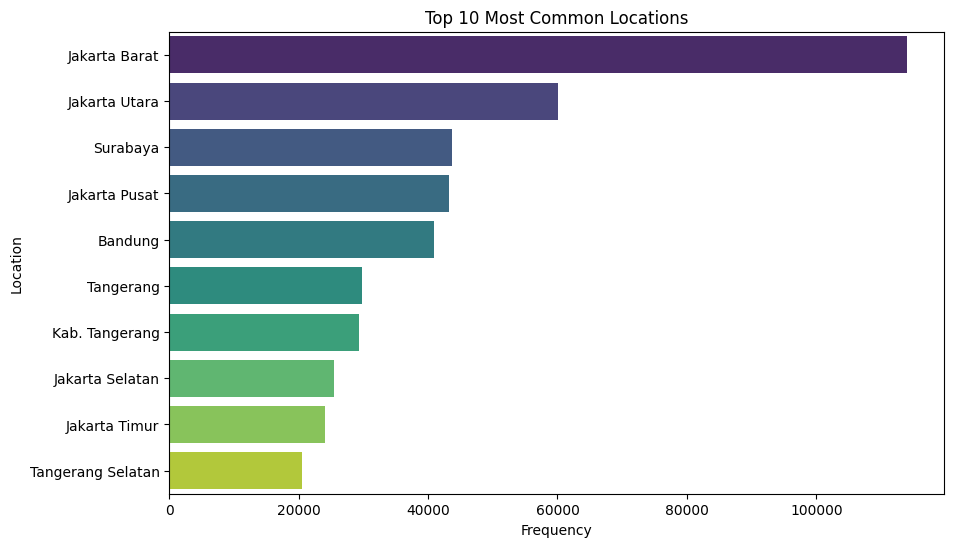

In [35]:
# Top 10 most common locations based on their frequency
top_location = df['location'][df['location'] != 'Unknown'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_location.values, y=top_location.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Location')
plt.title('Top 10 Most Common Locations')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_30256\1576868031.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='coolwarm')


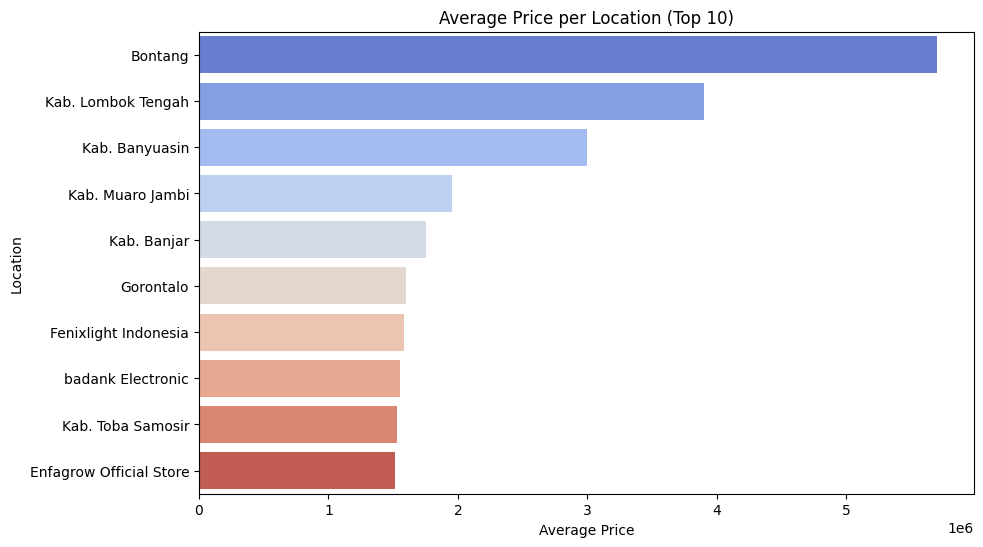

In [36]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_location.values, y=avg_price_location.index, palette='coolwarm')
plt.title('Average Price per Location (Top 10)')
plt.xlabel('Average Price')
plt.ylabel('Location')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_30256\518624240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sold_locations.values, y=top_sold_locations.index, palette="Blues_r")


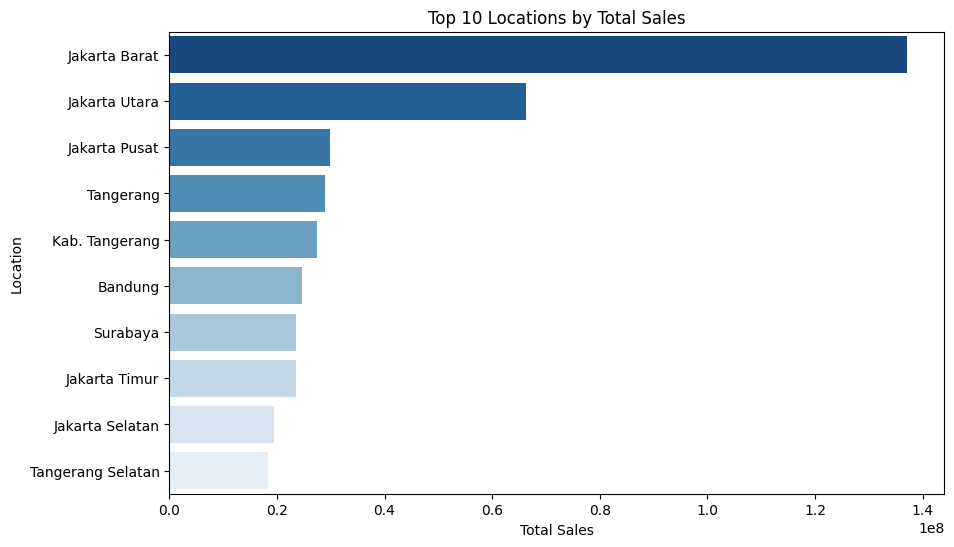

In [37]:
top_sold_locations = df.groupby('location')['sold'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sold_locations.values, y=top_sold_locations.index, palette="Blues_r")
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Location')
plt.show()


## Text Clustering

In [38]:
# copy 'name' column to new dataframe for clustering
df_clustering = df.copy()
df_clustering.head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,167500.0,Unknown,0.0,0.0
1,Terbatas Sewa Global Travel Wifi Middle East A...,207110.0,Unknown,0.0,0.0
2,paper bowl 650 ml rice bowl 22 oz star pack ma...,725.0,Bandung,5.0,10000.0
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,191000.0,Unknown,0.0,0.0
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,379000.0,Unknown,0.0,0.0


In [39]:
# check duplicates in 'name' column
df_clustering[df_clustering.duplicated(subset='name')]

,name,price,location,rating,sold
2177,PT01-D Pita tali balon ribbon bunga 5 mm 1 met...,300.0,Jakarta Timur,5.0,80.0
3217,Memory Stick Pro HG Duo Card SONY Kamera PSP 16GB,248000.0,Unknown,0.0,0.0
3350,"Squalene - Obat Kolesterol, Sakit Jantung, Str...",117000.0,Unknown,0.0,0.0
3575,Mainan Anak Ring Basket Free Bola Basket - Bas...,17300.0,Jakarta Utara,4.9,100.0
3879,Tas make up Mainan Kosmetik Anak salon Makeup ...,17500.0,Jakarta Barat,4.9,100.0
...,...,...,...,...,...
933973,NOVA MIXED BERRIES Rabbit Food / NOVA ALFALFA ...,33980.0,Jakarta Barat,5.0,250.0
933977,PAKET CCTV HIKVISION 5MP 4 CHANNEL 4 CAMERA TU...,2722700.0,Unknown,0.0,0.0
933978,Klakson Denso disc Waterproof 12 V Bisa Buat M...,10750.0,Jakarta Pusat,4.8,100.0
933980,Vegetables Mix Capcay Frozen Sayuran Beku Capc...,28000.0,Jakarta Utara,5.0,9.0


In [40]:
# delete duplicates in 'name' column and keep the first row
df_clustering.drop_duplicates(subset='name', keep='first', inplace=True)

In [41]:
# check duplicates in 'name' column after deleting duplicates
df_clustering[df_clustering.duplicated(subset='name')]

,name,price,location,rating,sold


In [42]:
# check null value in 'name' column
df_clustering['name'].isna().sum()

np.int64(1)

In [43]:
# delete null value in 'name' column
df_clustering.dropna(subset=['name'], inplace=True)

# check null value in 'name' column after deleting null value
df_clustering['name'].isna().sum()

np.int64(0)

In [44]:
df_clustering.head()

,name,price,location,rating,sold
0,JUBAH HITAM MADANI JUBAH MADANI GAMIS PRIA JUB...,167500.0,Unknown,0.0,0.0
1,Terbatas Sewa Global Travel Wifi Middle East A...,207110.0,Unknown,0.0,0.0
2,paper bowl 650 ml rice bowl 22 oz star pack ma...,725.0,Bandung,5.0,10000.0
3,Profesional Hitam Bambu Dizi Seruling Buatan T...,191000.0,Unknown,0.0,0.0
4,HEPA FILTER Air Purifier Levoit Core 400s / Co...,379000.0,Unknown,0.0,0.0


In [45]:
df_clustering.reset_index(drop=True, inplace=True)

In [46]:
# get 1% sample of 'name' column for clustering
df_clustering = df_clustering.sample(frac=0.01, random_state=42)
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8061 entries, 182081 to 421928
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      8061 non-null   object 
 1   price     8061 non-null   float64
 2   location  8061 non-null   object 
 3   rating    8061 non-null   float64
 4   sold      8061 non-null   float64
dtypes: float64(3), object(2)
memory usage: 377.9+ KB


In [47]:
df_clustering['name_length'] = df_clustering['name'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       61.348964
std        21.620530
min         8.000000
25%        50.000000
50%        64.000000
75%        69.000000
max       255.000000
Name: name_length, dtype: float64

In [48]:
df_clustering = df_clustering[['name', 'name_length']]
df_clustering.reset_index(drop=True, inplace=True)
df_clustering.head()

,name,name_length
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,48
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,56
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,66
3,Blazer wanita jumbo big size stik balik / plus...,57
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69


## Preprocessing name column for clustering

In [49]:
# load indonesian stopword
factory = StopWordRemoverFactory()
indonesian_stopwords = set(factory.get_stop_words())

# load english stopword
english_stopwords = set(stopwords.words('english'))

# combine stopword
combined_stopwords = indonesian_stopwords.union(english_stopwords)

def basic_preprocess(text):
    # convert to string
    text = str(text)
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = re.sub(f"[{string.punctuation}]", ' ', text)
    # remove digit/number
    text = re.sub(r'\d+', ' ', text)
    # remove 1 character word
    text = re.sub(r'[^a-z\s]', ' ', text)
    # filtering stopwords
    text = ' '.join(word for word in text.split() if word not in combined_stopwords)
    # remove extra space
    text = text.strip()
    text = re.sub('\s+', ' ', text)
    return text

# apply basic_preprocess function to 'name' column
df_clustering['clean_name'] = df_clustering['name'].apply(basic_preprocess)
df_clustering.head()

,name,name_length,clean_name
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,48,gamis pria dewasa premium jubah pakistan polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,56,buket bunga mawar flanel bunga wisuda bunga so...
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,66,mika sen depan supra fit new kaca lampu sein d...
3,Blazer wanita jumbo big size stik balik / plus...,57,blazer wanita jumbo big size stik balik plus s...
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...


In [50]:
def extract_noun_id(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        doc = nlp(cleaned_text)
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos in {'NOUN', 'PROPN'}]
        
        if nouns:
            nouns = list(dict.fromkeys(nouns))
            return ' '.join(nouns)
        else:
            return cleaned_text
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''
    
df_clustering['noun_id'] = df_clustering['name'].apply(extract_noun_id)
df_clustering.head()

,name,name_length,clean_name,noun_id
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,48,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,56,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,66,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...
3,Blazer wanita jumbo big size stik balik / plus...,57,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani


In [51]:
df_clustering['name_length'] = df_clustering['noun_id'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       45.366704
std        17.688257
min         2.000000
25%        34.000000
50%        45.000000
75%        56.000000
max       224.000000
Name: name_length, dtype: float64

In [52]:
def extract_noun_en(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        doc = nlp_en(cleaned_text)
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos in {'NOUN', 'PROPN'}]
        
        if nouns:
            nouns = list(dict.fromkeys(nouns))
            return ' '.join(nouns)
        else:
            return cleaned_text
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''
    
df_clustering['en_noun'] = df_clustering['name'].apply(extract_noun_en)
df_clustering.head()

,name,name_length,clean_name,noun_id,en_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,33,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,40,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,66,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor
3,Blazer wanita jumbo big size stik balik / plus...,46,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,48,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...


In [53]:
df_clustering['name_length'] = df_clustering['en_noun'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       39.219700
std        20.675911
min         1.000000
25%        25.000000
50%        39.000000
75%        52.000000
max       255.000000
Name: name_length, dtype: float64

In [55]:
df_clustering[df_clustering['name_length'] == 1]

,name,name_length,clean_name,noun_id,en_noun
173,"Buku Agama Kristen, KONSELING PASTORAL DALAM T...",1,buku agama kristen konseling pastoral transisi...,buku agama kristen konseling transisi charles v g,g
1822,Z♪4I Mainan Tradisional Bola Bekel + Biji B✔61,1,z mainan tradisional bola bekel biji b,z 4i mainan bola bekel biji b,b
2400,Abon Ikan Pedas Hj Mbok Sri 100 g,1,abon ikan pedas hj mbok sri g,abon ikan pedas hj mbok sri g,g
2802,Celana Dalam Wanita Sorex 1238 M - QL,1,celana wanita sorex ql,celana wanita sorex m ql,m
2918,Baju Renang Anak Bayi Laki-Laki Bermodel Sport...,1,baju renang anak bayi laki laki bermodel sport...,baju renang anak bayi laki sport tahun l,l
3933,KISERA JILBAB KERUDUNG EMPAT WARNA HIJAB SEGI ...,1,kisera jilbab kerudung empat warna hijab segi ...,kisera jilbab kerudung warna hijab segi janna m,m
4054,20m Alat Katrol Barang Manual Alat Derek Manua...,1,alat katrol barang manual alat derek manual ka...,20m alat katrol barang derek kerekan,m
4472,K☛26 ROK SYAKILLA - BAWAHAN ROK PANJANG ANAK P...,1,k rok syakilla bawahan rok panjang anak peremp...,rok syakilla bawahan anak perempuan korea muslim,k


In [56]:
def extract_dual_noun(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        doc = nlp(cleaned_text)
        nouns = [word.text for sentence in doc.sentences for word in sentence.words if word.upos in {'NOUN', 'PROPN'}]
        
        doc_en = nlp_en(cleaned_text)
        nouns_en = [word.text for sentence in doc_en.sentences for word in sentence.words if word.upos in {'NOUN', 'PROPN'}]
        
        all_nouns = nouns + nouns_en
        if all_nouns:
            nouns = list(dict.fromkeys(all_nouns))
            return ' '.join(nouns)
        else:
            return cleaned_text
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''
    
df_clustering['dual_noun'] = df_clustering['name'].apply(extract_dual_noun)
df_clustering.head()

,name,name_length,clean_name,noun_id,en_noun,dual_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,46,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan dewasa polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,11,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel wisuda souvenir
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,10,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra fit new kaca lampu sein d...
3,Blazer wanita jumbo big size stik balik / plus...,35,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik,blazer wanita jumbo size stik balik plus outer
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani


In [57]:
df_clustering['name_length'] = df_clustering['dual_noun'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       49.565314
std        17.498532
min         5.000000
25%        38.000000
50%        49.000000
75%        59.000000
max       224.000000
Name: name_length, dtype: float64

### Clustering

In [58]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', device="cuda")
clean_name = model.encode(df_clustering['clean_name'].tolist(), convert_to_numpy=True, batch_size=32)
noun_id = model.encode(df_clustering['noun_id'].tolist(), convert_to_numpy=True, batch_size=32)
en_noun = model.encode(df_clustering['en_noun'].tolist(), convert_to_numpy=True, batch_size=32)
dual_noun = model.encode(df_clustering['dual_noun'].tolist(), convert_to_numpy=True, batch_size=32)
X_clean_name = np.vstack(list(clean_name))
X_noun_id = np.vstack(list(noun_id))
X_en_noun = np.vstack(list(en_noun))
X_dual_noun = np.vstack(list(dual_noun))

c:\Users\User\Documents\Code\env\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


#### Clustering Using Basic Text Preprocessing (lowercase, remove stopword, punctuation, etc)

K=2, Silhouette Score=0.05077790096402168
K=3, Silhouette Score=0.04302723705768585
K=4, Silhouette Score=0.03930092230439186
K=5, Silhouette Score=0.040824174880981445
K=6, Silhouette Score=0.04039844498038292
K=7, Silhouette Score=0.03931697458028793
K=8, Silhouette Score=0.04033350199460983
K=9, Silhouette Score=0.04188140481710434
K=10, Silhouette Score=0.027836645022034645
K=11, Silhouette Score=0.027914291247725487
K=12, Silhouette Score=0.026760311797261238
K=13, Silhouette Score=0.02371356450021267
K=14, Silhouette Score=0.02506067045032978
K=15, Silhouette Score=0.02574559859931469
K=16, Silhouette Score=0.026757018640637398
K=17, Silhouette Score=0.02108883485198021
K=18, Silhouette Score=0.023289404809474945
K=19, Silhouette Score=0.032403744757175446


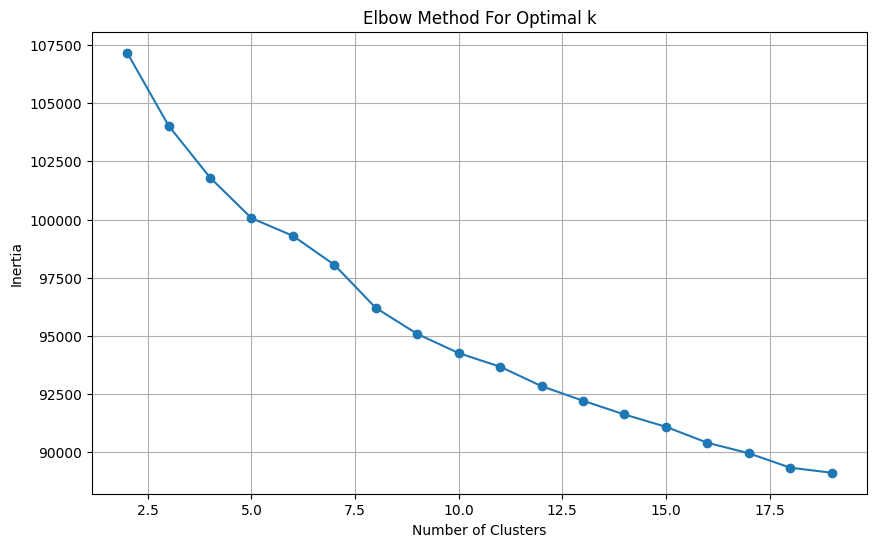

In [137]:
inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_name)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_name, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1000, Silhouette Score=0.046104468405246735
K=1001, Silhouette Score=0.04701937735080719
K=1002, Silhouette Score=0.04714767262339592
K=1003, Silhouette Score=0.047156643122434616
K=1004, Silhouette Score=0.04625461623072624
K=1005, Silhouette Score=0.04625481367111206
K=1006, Silhouette Score=0.04619789123535156
K=1007, Silhouette Score=0.04619012773036957
K=1008, Silhouette Score=0.046617086976766586
K=1009, Silhouette Score=0.04659520834684372
K=1010, Silhouette Score=0.04710936173796654
K=1011, Silhouette Score=0.04709348455071449
K=1012, Silhouette Score=0.04649686813354492
K=1013, Silhouette Score=0.04671062156558037
K=1014, Silhouette Score=0.046791333705186844
K=1015, Silhouette Score=0.0468372143805027
K=1016, Silhouette Score=0.046721648424863815
K=1017, Silhouette Score=0.04683730751276016
K=1018, Silhouette Score=0.046880535781383514
K=1019, Silhouette Score=0.04697226732969284


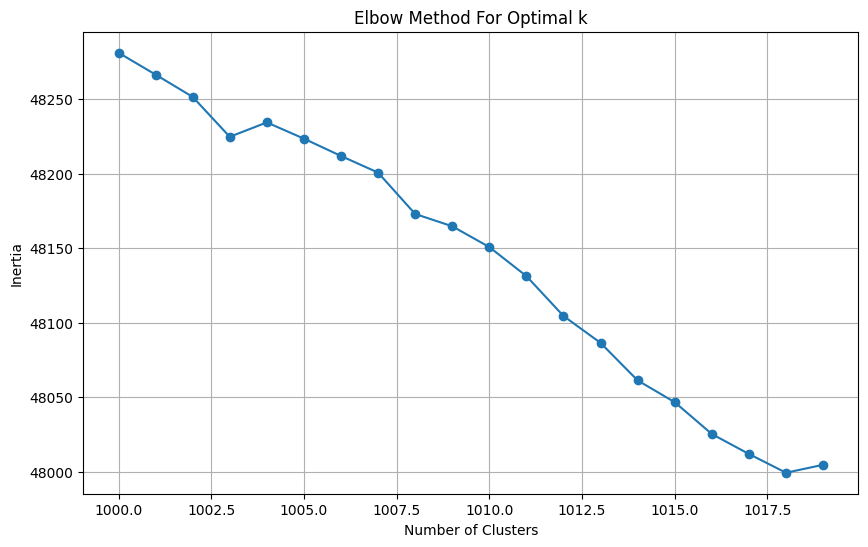

In [138]:

inertia_values = []
cluster_range = range(1000, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_name)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_name, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2000, Silhouette Score=0.04601719230413437
K=2001, Silhouette Score=0.04598758742213249
K=2002, Silhouette Score=0.04602959752082825
K=2003, Silhouette Score=0.046110253781080246
K=2004, Silhouette Score=0.04611510783433914
K=2005, Silhouette Score=0.04605894908308983
K=2006, Silhouette Score=0.04613945260643959
K=2007, Silhouette Score=0.046205248683691025
K=2008, Silhouette Score=0.046300288289785385
K=2009, Silhouette Score=0.04623023420572281
K=2010, Silhouette Score=0.046222638338804245
K=2011, Silhouette Score=0.04624748229980469
K=2012, Silhouette Score=0.04624991863965988
K=2013, Silhouette Score=0.046218182891607285
K=2014, Silhouette Score=0.04627656191587448
K=2015, Silhouette Score=0.046337809413671494
K=2016, Silhouette Score=0.046205028891563416
K=2017, Silhouette Score=0.04620301350951195
K=2018, Silhouette Score=0.04618624225258827
K=2019, Silhouette Score=0.04618516191840172


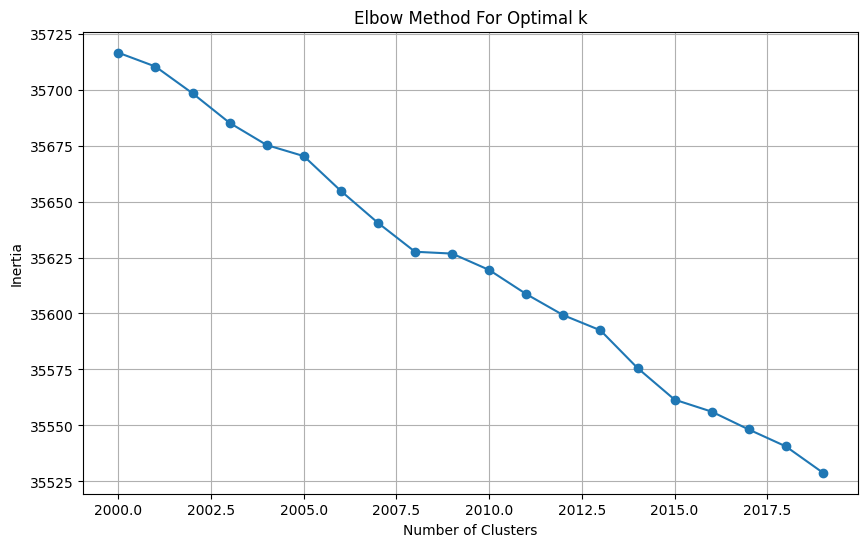

In [148]:

inertia_values = []
cluster_range = range(2000, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_name)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_name, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

#### Clustering Using Text Filter Noun ID

K=2, Silhouette Score=0.05349822714924812
K=3, Silhouette Score=0.044351957738399506
K=4, Silhouette Score=0.03948088735342026
K=5, Silhouette Score=0.0412934310734272
K=6, Silhouette Score=0.03864705190062523
K=7, Silhouette Score=0.03203761950135231
K=8, Silhouette Score=0.035237330943346024
K=9, Silhouette Score=0.0317034088075161
K=10, Silhouette Score=0.03140237182378769
K=11, Silhouette Score=0.032060716301202774
K=12, Silhouette Score=0.027560194954276085
K=13, Silhouette Score=0.034157294780015945
K=14, Silhouette Score=0.033623989671468735
K=15, Silhouette Score=0.029992301017045975
K=16, Silhouette Score=0.0353349931538105
K=17, Silhouette Score=0.036332834511995316
K=18, Silhouette Score=0.034937452524900436
K=19, Silhouette Score=0.03708307817578316


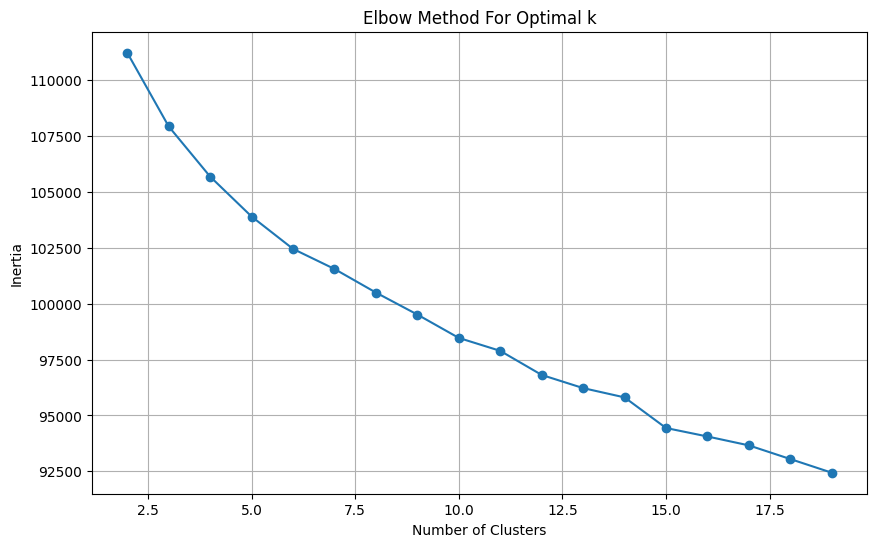

In [139]:

inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_noun_id)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_noun_id, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1000, Silhouette Score=0.04106597602367401
K=1001, Silhouette Score=0.041096992790699005
K=1002, Silhouette Score=0.04063927382230759
K=1003, Silhouette Score=0.040574491024017334
K=1004, Silhouette Score=0.040581416338682175
K=1005, Silhouette Score=0.040603894740343094
K=1006, Silhouette Score=0.04062933474779129
K=1007, Silhouette Score=0.040540214627981186
K=1008, Silhouette Score=0.04039037600159645
K=1009, Silhouette Score=0.04033636301755905
K=1010, Silhouette Score=0.04033414646983147
K=1011, Silhouette Score=0.04031701013445854
K=1012, Silhouette Score=0.04042433947324753
K=1013, Silhouette Score=0.040472570806741714
K=1014, Silhouette Score=0.04048043116927147
K=1015, Silhouette Score=0.039644815027713776
K=1016, Silhouette Score=0.03965897858142853
K=1017, Silhouette Score=0.039784159511327744
K=1018, Silhouette Score=0.03976907208561897
K=1019, Silhouette Score=0.03974946215748787


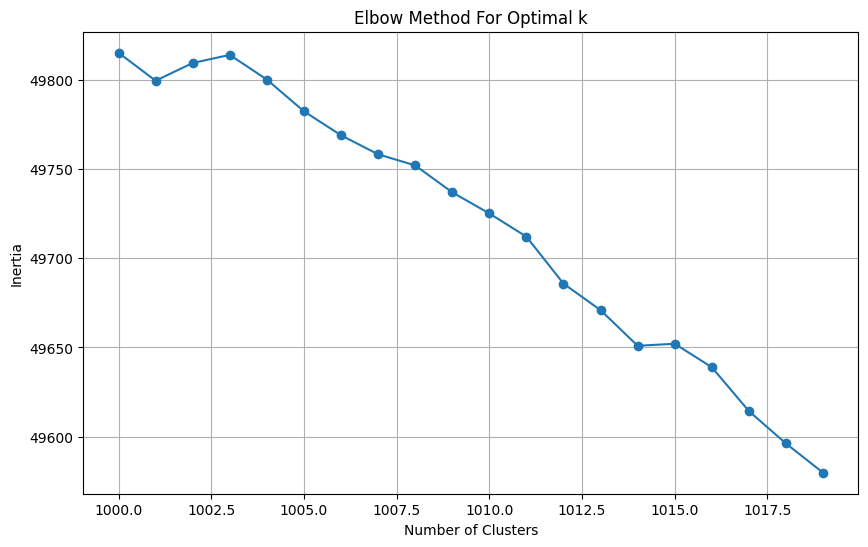

In [140]:

inertia_values = []
cluster_range = range(1000, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_noun_id)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_noun_id, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2000, Silhouette Score=0.04647040739655495
K=2001, Silhouette Score=0.046464961022138596
K=2002, Silhouette Score=0.04646793752908707
K=2003, Silhouette Score=0.04649409279227257
K=2004, Silhouette Score=0.04650159925222397
K=2005, Silhouette Score=0.04650454595685005
K=2006, Silhouette Score=0.04653100296854973
K=2007, Silhouette Score=0.046626582741737366
K=2008, Silhouette Score=0.04654312506318092
K=2009, Silhouette Score=0.04670337215065956
K=2010, Silhouette Score=0.046692173928022385
K=2011, Silhouette Score=0.04669731482863426
K=2012, Silhouette Score=0.04671241343021393
K=2013, Silhouette Score=0.04650616645812988
K=2014, Silhouette Score=0.046536173671483994
K=2015, Silhouette Score=0.04670511558651924
K=2016, Silhouette Score=0.046676501631736755
K=2017, Silhouette Score=0.046812545508146286
K=2018, Silhouette Score=0.04680270701646805
K=2019, Silhouette Score=0.04682747647166252


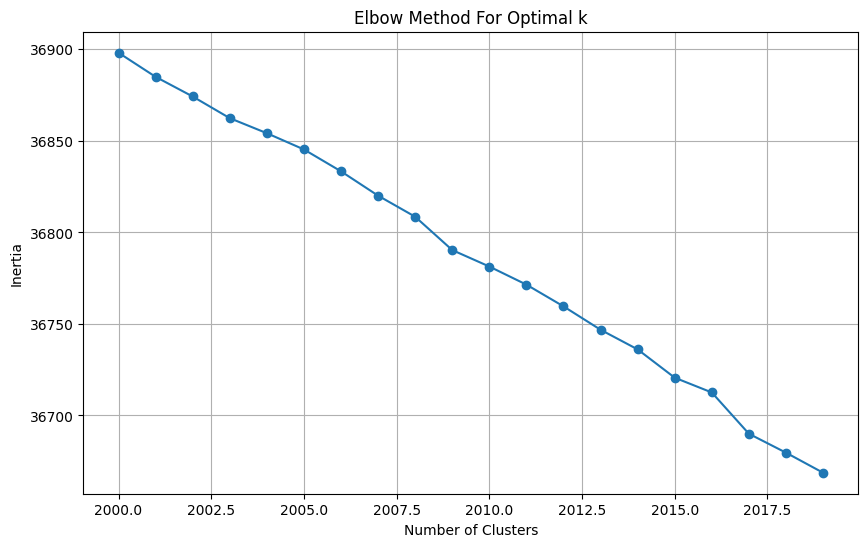

In [145]:

inertia_values = []
cluster_range = range(2000, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_noun_id)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_noun_id, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

#### Clustering Using Text Filter Noun EN

K=2, Silhouette Score=0.049971841275691986
K=3, Silhouette Score=0.044735945761203766
K=4, Silhouette Score=0.04345345124602318
K=5, Silhouette Score=0.04373214766383171
K=6, Silhouette Score=0.039774615317583084
K=7, Silhouette Score=0.04301776364445686
K=8, Silhouette Score=0.03894692659378052
K=9, Silhouette Score=0.03231951221823692
K=10, Silhouette Score=0.03458292409777641
K=11, Silhouette Score=0.03754539415240288
K=12, Silhouette Score=0.02309851348400116
K=13, Silhouette Score=0.027099067345261574
K=14, Silhouette Score=0.03261948749423027
K=15, Silhouette Score=0.035151224583387375
K=16, Silhouette Score=0.0358060784637928
K=17, Silhouette Score=0.035643670707941055
K=18, Silhouette Score=0.038216836750507355
K=19, Silhouette Score=0.03715437278151512


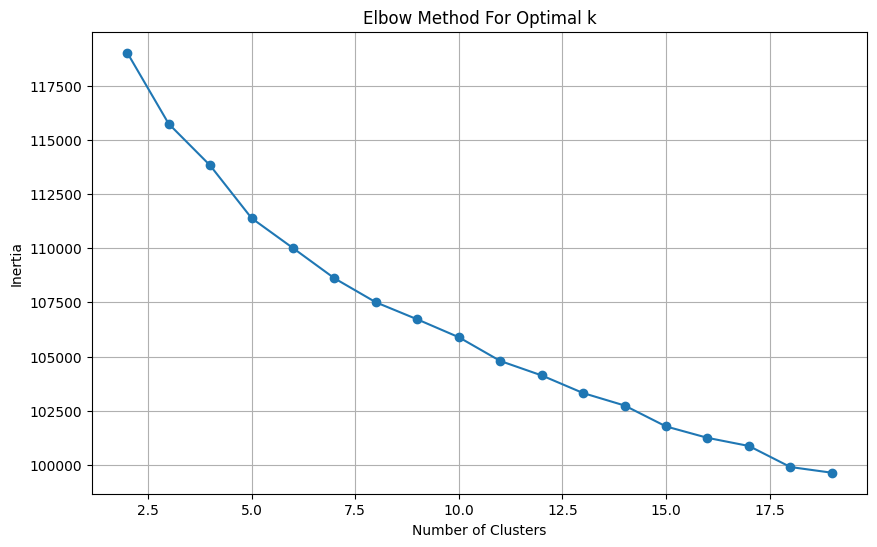

In [141]:
inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1000, Silhouette Score=0.05120408162474632
K=1001, Silhouette Score=0.050902172923088074
K=1002, Silhouette Score=0.05076960474252701
K=1003, Silhouette Score=0.050842270255088806
K=1004, Silhouette Score=0.05091407150030136
K=1005, Silhouette Score=0.050697699189186096
K=1006, Silhouette Score=0.050775375217199326
K=1007, Silhouette Score=0.050848472863435745
K=1008, Silhouette Score=0.050883565098047256
K=1009, Silhouette Score=0.050810281187295914
K=1010, Silhouette Score=0.0506213903427124
K=1011, Silhouette Score=0.05043356865644455
K=1012, Silhouette Score=0.050599634647369385
K=1013, Silhouette Score=0.05104333534836769
K=1014, Silhouette Score=0.05068199336528778
K=1015, Silhouette Score=0.05064242333173752
K=1016, Silhouette Score=0.050548795610666275
K=1017, Silhouette Score=0.04999937862157822
K=1018, Silhouette Score=0.05003475397825241
K=1019, Silhouette Score=0.050071753561496735


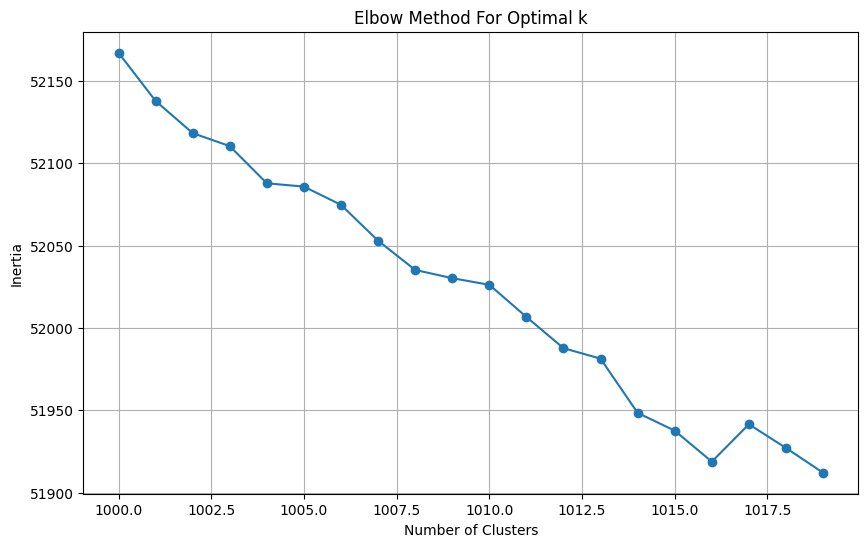

In [142]:
inertia_values = []
cluster_range = range(1000, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2000, Silhouette Score=0.059333689510822296
K=2001, Silhouette Score=0.059336572885513306
K=2002, Silhouette Score=0.05939658731222153
K=2003, Silhouette Score=0.059172626584768295
K=2004, Silhouette Score=0.05916253477334976
K=2005, Silhouette Score=0.05919086933135986
K=2006, Silhouette Score=0.05920903757214546
K=2007, Silhouette Score=0.059299059212207794
K=2008, Silhouette Score=0.059284187853336334
K=2009, Silhouette Score=0.05928444117307663
K=2010, Silhouette Score=0.059314366430044174
K=2011, Silhouette Score=0.05932261794805527
K=2012, Silhouette Score=0.05929611995816231
K=2013, Silhouette Score=0.05928729474544525
K=2014, Silhouette Score=0.05931753292679787
K=2015, Silhouette Score=0.05931759998202324
K=2016, Silhouette Score=0.059262823313474655
K=2017, Silhouette Score=0.05928841605782509
K=2018, Silhouette Score=0.059182144701480865
K=2019, Silhouette Score=0.05916513875126839


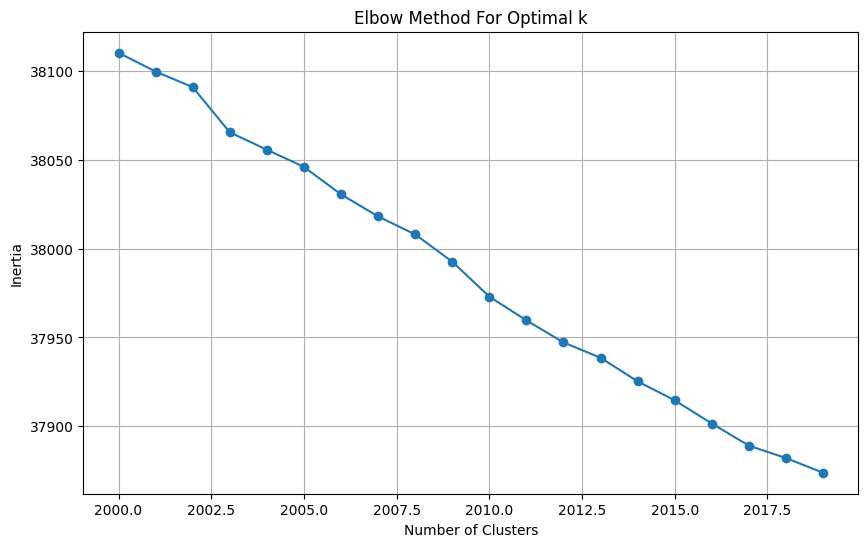

In [146]:

inertia_values = []
cluster_range = range(2000, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=5000, Silhouette Score=0.06575776636600494
K=5001, Silhouette Score=0.06576716899871826
K=5002, Silhouette Score=0.0657878890633583
K=5003, Silhouette Score=0.0658223032951355
K=5004, Silhouette Score=0.06575118005275726
K=5005, Silhouette Score=0.06582587957382202
K=5006, Silhouette Score=0.065833680331707
K=5007, Silhouette Score=0.06578131765127182
K=5008, Silhouette Score=0.06573496013879776
K=5009, Silhouette Score=0.06575484573841095
K=5010, Silhouette Score=0.06579484045505524
K=5011, Silhouette Score=0.06575188040733337
K=5012, Silhouette Score=0.06577168405056
K=5013, Silhouette Score=0.06584544479846954
K=5014, Silhouette Score=0.06573949009180069
K=5015, Silhouette Score=0.06572136282920837
K=5016, Silhouette Score=0.06574730575084686
K=5017, Silhouette Score=0.06577670574188232
K=5018, Silhouette Score=0.0657511055469513
K=5019, Silhouette Score=0.06578033417463303


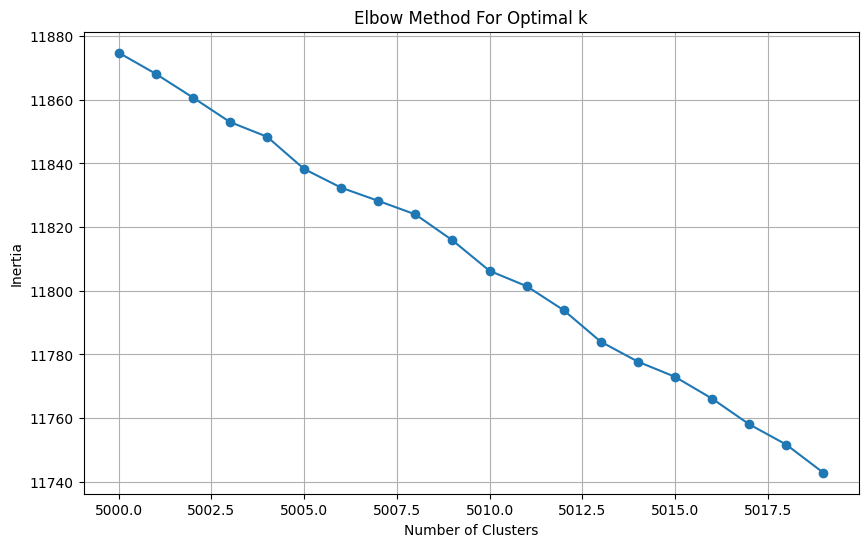

In [149]:

inertia_values = []
cluster_range = range(5000, 5020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

#### Clustering Using Text Filter Dual Noun (ID + EN)

K=2, Silhouette Score=0.05403771623969078
K=3, Silhouette Score=0.04396332427859306
K=4, Silhouette Score=0.04268493503332138
K=5, Silhouette Score=0.038453832268714905
K=6, Silhouette Score=0.041346658021211624
K=7, Silhouette Score=0.04262760654091835
K=8, Silhouette Score=0.04272354766726494
K=9, Silhouette Score=0.042765941470861435
K=10, Silhouette Score=0.04082780331373215
K=11, Silhouette Score=0.042039837688207626
K=12, Silhouette Score=0.04130901023745537
K=13, Silhouette Score=0.04128793254494667
K=14, Silhouette Score=0.040399737656116486
K=15, Silhouette Score=0.03435806930065155
K=16, Silhouette Score=0.033465392887592316
K=17, Silhouette Score=0.028993815183639526
K=18, Silhouette Score=0.027951080352067947
K=19, Silhouette Score=0.027145208790898323


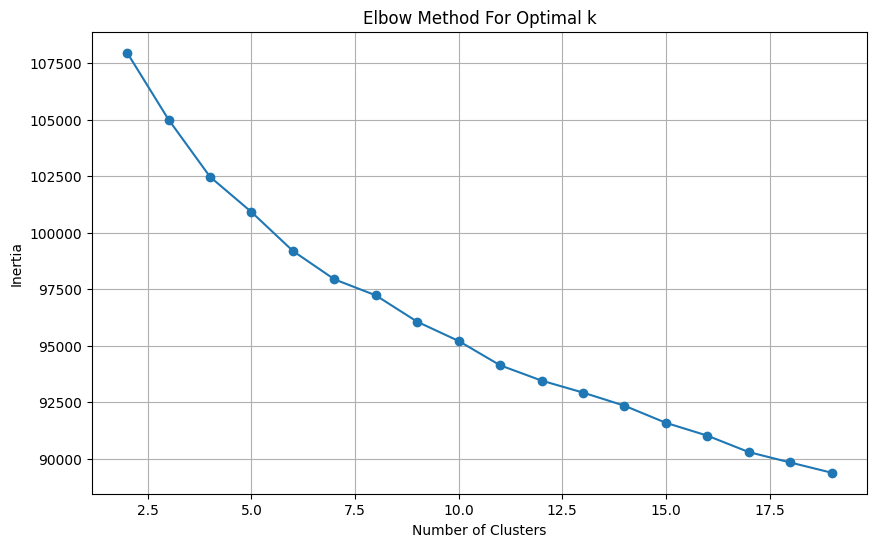

In [143]:

inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_dual_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_dual_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1000, Silhouette Score=0.04251284897327423
K=1001, Silhouette Score=0.042418740689754486
K=1002, Silhouette Score=0.042373623698949814
K=1003, Silhouette Score=0.0425104945898056
K=1004, Silhouette Score=0.0423080176115036
K=1005, Silhouette Score=0.04208054766058922
K=1006, Silhouette Score=0.04205246642231941
K=1007, Silhouette Score=0.0420985072851181
K=1008, Silhouette Score=0.04206056892871857
K=1009, Silhouette Score=0.04203767701983452
K=1010, Silhouette Score=0.042039986699819565
K=1011, Silhouette Score=0.04228421300649643
K=1012, Silhouette Score=0.04256879910826683
K=1013, Silhouette Score=0.04273795709013939
K=1014, Silhouette Score=0.04279182478785515
K=1015, Silhouette Score=0.04270019009709358
K=1016, Silhouette Score=0.042667046189308167
K=1017, Silhouette Score=0.042669329792261124
K=1018, Silhouette Score=0.042716365307569504
K=1019, Silhouette Score=0.042644791305065155


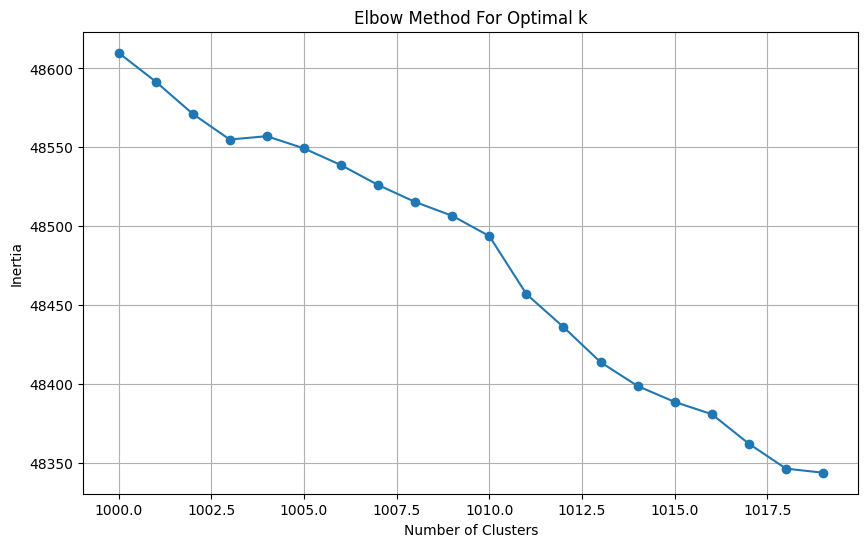

In [144]:

inertia_values = []
cluster_range = range(1000, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_dual_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_dual_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2000, Silhouette Score=0.04599614441394806
K=2001, Silhouette Score=0.04602517932653427
K=2002, Silhouette Score=0.04575660452246666
K=2003, Silhouette Score=0.04575730860233307
K=2004, Silhouette Score=0.0457783043384552
K=2005, Silhouette Score=0.045809123665094376
K=2006, Silhouette Score=0.04582786560058594
K=2007, Silhouette Score=0.045803215354681015
K=2008, Silhouette Score=0.04576210305094719
K=2009, Silhouette Score=0.045837923884391785
K=2010, Silhouette Score=0.04584810137748718
K=2011, Silhouette Score=0.045715223997831345
K=2012, Silhouette Score=0.045659467577934265
K=2013, Silhouette Score=0.04566609486937523
K=2014, Silhouette Score=0.04572944715619087
K=2015, Silhouette Score=0.045776478946208954
K=2016, Silhouette Score=0.045893337577581406
K=2017, Silhouette Score=0.04589906707406044
K=2018, Silhouette Score=0.04593475162982941
K=2019, Silhouette Score=0.04592740535736084


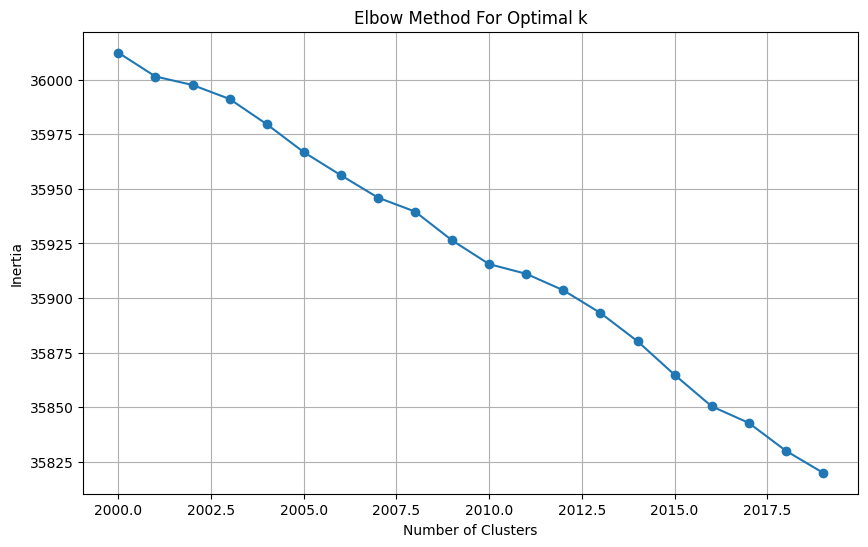

In [147]:

inertia_values = []
cluster_range = range(2000, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_dual_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_dual_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

#### Since EN noun provide the best results, we will continue preprocessing by removing words that are not related based on the 1,000 most frequent words.

In [59]:
all_words = ' '.join(df_clustering['en_noun']).split()
word_counts = Counter(all_words)

print("1000 Most Frequent Words: (en_noun)")
for word, count in word_counts.most_common()[0:1000]:
    print(f"{word}: {count}")

1000 Most Frequent Words: (en_noun)
buku: 338
anak: 333
pria: 246
mobil: 222
cm: 217
dan: 211
set: 190
pcs: 189
premium: 186
air: 171
mm: 165
mini: 158
isi: 158
wanita: 152
m: 149
original: 147
celana: 145
ml: 144
baju: 143
motor: 139
box: 131
panjang: 130
tas: 130
inch: 125
mainan: 123
baby: 123
sepatu: 119
gr: 116
putih: 108
bag: 107
bayi: 106
polos: 97
kg: 95
kaos: 94
kabel: 93
card: 92
cat: 92
kertas: 89
laptop: 89
sarung: 87
murah: 84
lampu: 84
hitam: 83
model: 83
kotak: 81
hp: 81
size: 79
untuk: 79
alat: 78
meter: 77
case: 77
usb: 76
pro: 76
v: 75
cover: 75
kayu: 74
tangan: 74
import: 73
motif: 72
power: 71
camera: 70
paket: 69
laki: 68
perempuan: 68
l: 67
ring: 67
makanan: 67
kucing: 66
tempat: 65
mesin: 64
series: 64
holder: 64
jaket: 64
pc: 63
merah: 63
rambut: 63
meja: 63
plastik: 63
body: 63
anti: 62
hair: 62
jam: 61
korea: 61
pelindung: 60
mata: 60
food: 60
b: 60
ukuran: 60
topi: 60
liter: 59
cream: 59
jumbo: 58
travel: 58
car: 58
listrik: 58
gram: 58
vitamin: 55
pack: 55
p

In [60]:
deleted_word = ['cm', 'dan', 'set', 'pcs', 'premium', 'mm', 'isi', 'm', 'original', 'ml', 'inch', 'panjang', 
                'gr', 'putih', 'kg', 'murah', 'hitam', 'size', 'untuk', 'meter', 'import', 'merah', 'korea', 
                'pelindung', 'ukuran', 'jumbo', 'travel', 'gram', 'promo', 'indonesia', 'warna', 'besar', 
                'quality', 'tahun', 'asil', 'termurah', 'terlaris', 'navy', 'japan', '2', 'xl', 'di', '4g', 
                'minimalis', 'unisex', 'gb', 'a5', 'jepang', 'abu', 'belajar', 'grey', 'mb', '2in1', 'cowok', 
                'segar', 'lucu', 'usia', 'cod', 'khusus', 'sewa', 'lengkap', 'harga', '3in1', 'stok', 'bonus', 
                'cewek', 'jerman', 'dll', 'xxl', '16gb', 'a3', 'ready']

def clean_text(text):
    text = ' '.join(word for word in text.split() if word not in deleted_word)
    return text

df_clustering['clean_en_noun'] = df_clustering['en_noun'].apply(clean_text)

In [61]:
df_clustering['name_length'] = df_clustering['clean_en_noun'].apply(len)
df_clustering['name_length'].describe()

count    8061.000000
mean       36.532192
std        19.712477
min         0.000000
25%        23.000000
50%        36.000000
75%        48.000000
max       254.000000
Name: name_length, dtype: float64

In [62]:
# check if there is empty string in 'clean_en_noun' column
df_clustering[df_clustering['name_length'] == 0]

,name,name_length,clean_name,noun_id,en_noun,dual_noun,clean_en_noun
22,BUKU ARBITRASE DI INDONESIA,0,buku arbitrase indonesia,buku arbitrase indonesia,di indonesia,buku arbitrase indonesia di,
127,celana dalam ihram tanpa jahit ukuran JUMBO ( ...,0,celana ihram jahit ukuran jumbo xxxl pcs,celana ihram jahit ukuran jumbo xxxl pcs,pcs,celana ihram jahit ukuran jumbo xxxl pcs,
195,celana kulot panjang wanita cargo bahan katun ...,0,celana kulot panjang wanita cargo bahan katun ...,celana kulot wanita bahan katun twill,premium,celana kulot wanita bahan katun twill premium,
370,72pcs Ikat Rambut Wanita Anak Kunciran Karet D...,0,pcs ikat rambut wanita anak kunciran karet don...,72pcs ikat rambut wanita anak kunciran karet d...,pcs,72pcs ikat rambut wanita anak kunciran karet d...,
402,PAKET ISI 6 PCS CELANA DALAM WANITA REMAJA DAN...,0,paket isi pcs celana wanita remaja dewasa warn...,paket isi pcs celana wanita remaja warna,isi,paket isi pcs celana wanita remaja warna,
...,...,...,...,...,...,...,...
7408,Mainan Edukasi Jimbe Bahan Kulit Hewan Tinggi ...,0,mainan edukasi jimbe bahan kulit hewan tinggi cm,mainan edukasi jimbe bahan kulit hewan cm,cm,mainan edukasi jimbe bahan kulit hewan cm,
7551,12 pcs Gantungan Baju Plastik Motif Rotan Teba...,0,pcs gantungan baju plastik motif rotan tebal k...,pcs gantungan baju plastik motif rotan laundry...,pcs,pcs gantungan baju plastik motif rotan laundry...,
7891,Tali Tambang Nylon/ Tali Nilon/ Tambang Putih/...,0,tali tambang nylon tali nilon tambang putih ta...,tali tambang nylon nilon mm,mm,tali tambang nylon nilon mm,
7892,Buku Bisnis dan Hukum Perdata Dagang kurikulum...,0,buku bisnis hukum perdata dagang kurikulum gbp...,buku bisnis hukum perdata kurikulum gbpp smk,dan,buku bisnis hukum perdata kurikulum gbpp smk dan,


In [63]:
# fill empty string in 'clean_en_noun' column with 'noun_id' column
df_clustering.loc[df_clustering['name_length'] == 0, 'clean_en_noun'] = df_clustering['noun_id'].apply(clean_text)

In [65]:
clean_en_noun = model.encode(df_clustering['clean_en_noun'].tolist(), convert_to_numpy=True, batch_size=32)
X_clean_en_noun = np.vstack(list(clean_en_noun))

#### Clustering Again Using Text Filter Noun EN and remove unrelated words

K=2, Silhouette Score=0.05352369695901871
K=3, Silhouette Score=0.045101266354322433
K=4, Silhouette Score=0.04532080888748169
K=5, Silhouette Score=0.04264771193265915
K=6, Silhouette Score=0.0387551449239254
K=7, Silhouette Score=0.03762289881706238
K=8, Silhouette Score=0.04005300998687744
K=9, Silhouette Score=0.04239393025636673
K=10, Silhouette Score=0.04163336008787155
K=11, Silhouette Score=0.039448000490665436
K=12, Silhouette Score=0.039666589349508286
K=13, Silhouette Score=0.040016379207372665
K=14, Silhouette Score=0.038871899247169495
K=15, Silhouette Score=0.036719776690006256
K=16, Silhouette Score=0.039439693093299866
K=17, Silhouette Score=0.02554544061422348
K=18, Silhouette Score=0.027243852615356445
K=19, Silhouette Score=0.02401222661137581


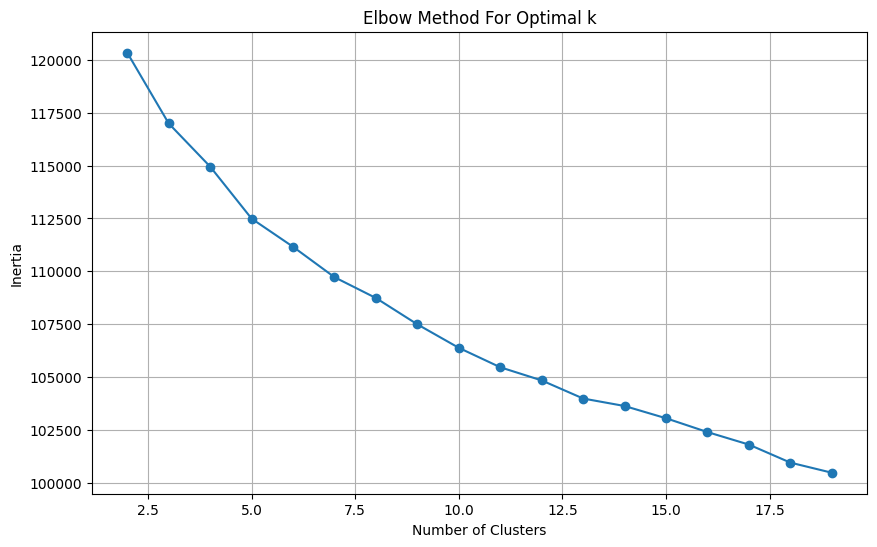

In [168]:
inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=102, Silhouette Score=0.017995668575167656
K=103, Silhouette Score=0.02032948099076748
K=104, Silhouette Score=0.017979752272367477
K=105, Silhouette Score=0.022392386570572853
K=106, Silhouette Score=0.020350558683276176
K=107, Silhouette Score=0.017996545881032944
K=108, Silhouette Score=0.019114743918180466
K=109, Silhouette Score=0.025160467252135277
K=110, Silhouette Score=0.021937275305390358
K=111, Silhouette Score=0.020512660965323448
K=112, Silhouette Score=0.021602651104331017
K=113, Silhouette Score=0.02324358932673931
K=114, Silhouette Score=0.021882854402065277
K=115, Silhouette Score=0.022159887477755547
K=116, Silhouette Score=0.024178167805075645
K=117, Silhouette Score=0.023666853085160255
K=118, Silhouette Score=0.016557790338993073
K=119, Silhouette Score=0.02070244960486889


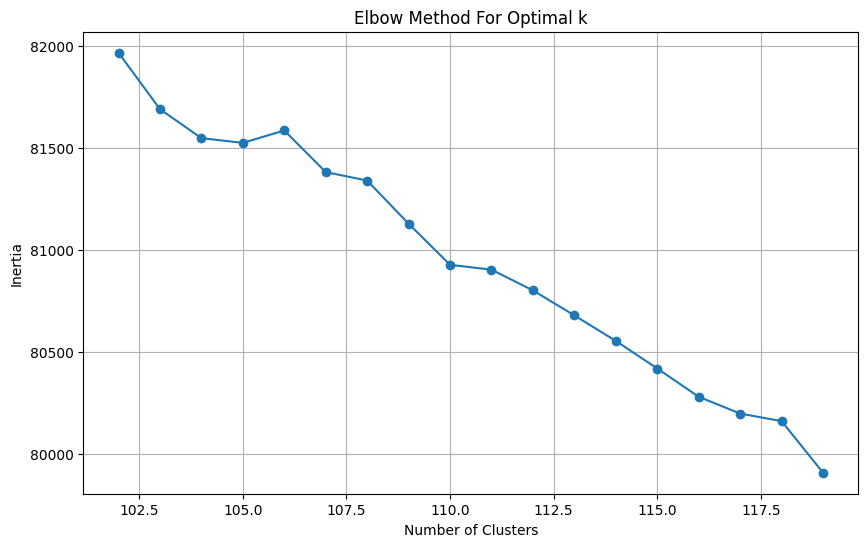

In [172]:

inertia_values = []
cluster_range = range(102, 120)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=502, Silhouette Score=0.045922912657260895
K=503, Silhouette Score=0.046015579253435135
K=504, Silhouette Score=0.04592982679605484
K=505, Silhouette Score=0.04598368704319
K=506, Silhouette Score=0.046048425137996674
K=507, Silhouette Score=0.04619936645030975
K=508, Silhouette Score=0.04610453173518181
K=509, Silhouette Score=0.04617464542388916
K=510, Silhouette Score=0.04614683985710144
K=511, Silhouette Score=0.046156901866197586
K=512, Silhouette Score=0.04574989527463913
K=513, Silhouette Score=0.045938946306705475
K=514, Silhouette Score=0.045966941863298416
K=515, Silhouette Score=0.0459863618016243
K=516, Silhouette Score=0.045996248722076416
K=517, Silhouette Score=0.04626748710870743
K=518, Silhouette Score=0.04594578966498375
K=519, Silhouette Score=0.04558459296822548


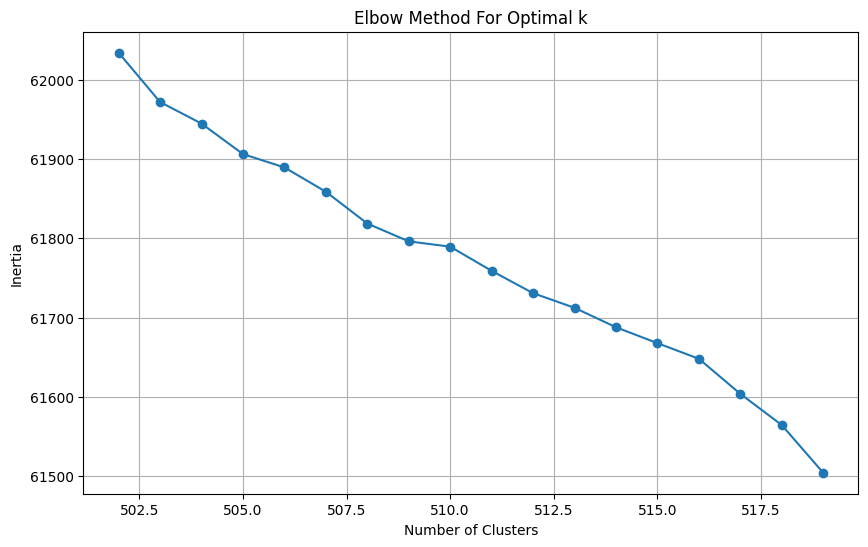

In [173]:

inertia_values = []
cluster_range = range(502, 520)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1000, Silhouette Score=0.05386272072792053
K=1001, Silhouette Score=0.05388259515166283
K=1002, Silhouette Score=0.053858134895563126
K=1003, Silhouette Score=0.05404099449515343
K=1004, Silhouette Score=0.054069772362709045
K=1005, Silhouette Score=0.053868748247623444
K=1006, Silhouette Score=0.053920045495033264
K=1007, Silhouette Score=0.0539056658744812
K=1008, Silhouette Score=0.05370504409074783
K=1009, Silhouette Score=0.05385565757751465
K=1010, Silhouette Score=0.05395498499274254
K=1011, Silhouette Score=0.053848572075366974
K=1012, Silhouette Score=0.05381180718541145
K=1013, Silhouette Score=0.05371430888772011
K=1014, Silhouette Score=0.05373146012425423
K=1015, Silhouette Score=0.05332552641630173
K=1016, Silhouette Score=0.053301215171813965
K=1017, Silhouette Score=0.05328699201345444
K=1018, Silhouette Score=0.05320766568183899
K=1019, Silhouette Score=0.05368595942854881


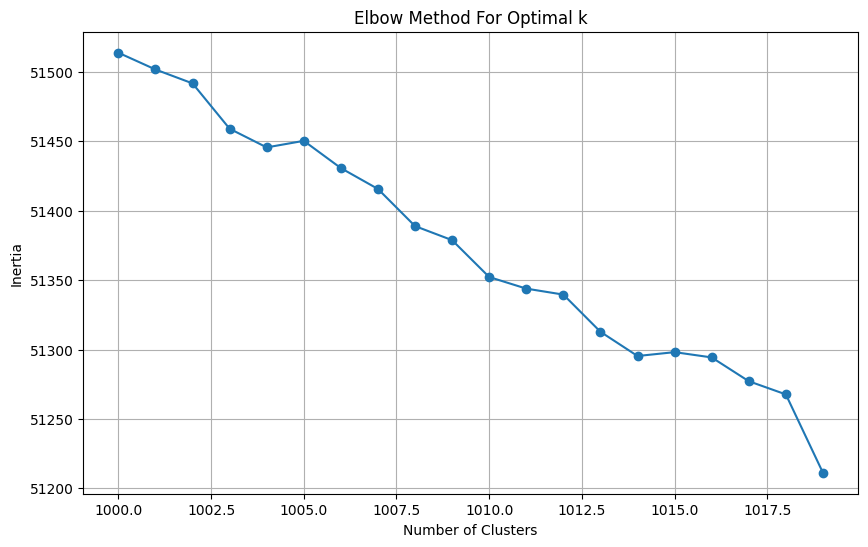

In [169]:

inertia_values = []
cluster_range = range(1000, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2000, Silhouette Score=0.05727388709783554
K=2001, Silhouette Score=0.0572623573243618
K=2002, Silhouette Score=0.05723422393202782
K=2003, Silhouette Score=0.057226601988077164
K=2004, Silhouette Score=0.057248204946517944
K=2005, Silhouette Score=0.05728523060679436
K=2006, Silhouette Score=0.05728437379002571
K=2007, Silhouette Score=0.057294245809316635
K=2008, Silhouette Score=0.05732345953583717
K=2009, Silhouette Score=0.05735260993242264
K=2010, Silhouette Score=0.05749695748090744
K=2011, Silhouette Score=0.05756635218858719
K=2012, Silhouette Score=0.05760227143764496
K=2013, Silhouette Score=0.05761203169822693
K=2014, Silhouette Score=0.05763686075806618
K=2015, Silhouette Score=0.05765092745423317
K=2016, Silhouette Score=0.05765480175614357
K=2017, Silhouette Score=0.057591646909713745
K=2018, Silhouette Score=0.05755561962723732
K=2019, Silhouette Score=0.0575530119240284


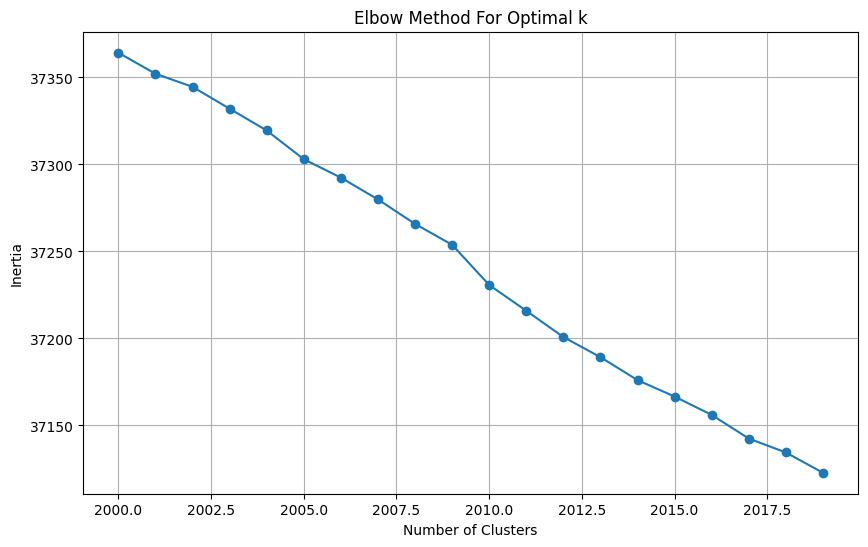

In [170]:

inertia_values = []
cluster_range = range(2000, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=5000, Silhouette Score=0.06805209815502167
K=5001, Silhouette Score=0.06807771325111389
K=5002, Silhouette Score=0.06807421892881393
K=5003, Silhouette Score=0.06808739900588989
K=5004, Silhouette Score=0.06790725886821747
K=5005, Silhouette Score=0.06781497597694397
K=5006, Silhouette Score=0.06785815954208374
K=5007, Silhouette Score=0.06786926835775375
K=5008, Silhouette Score=0.06782976537942886
K=5009, Silhouette Score=0.06780286133289337
K=5010, Silhouette Score=0.0678316280245781
K=5011, Silhouette Score=0.06784563511610031
K=5012, Silhouette Score=0.06778465211391449
K=5013, Silhouette Score=0.06774251908063889
K=5014, Silhouette Score=0.06779028475284576
K=5015, Silhouette Score=0.06787487119436264
K=5016, Silhouette Score=0.06787674874067307
K=5017, Silhouette Score=0.06786922365427017
K=5018, Silhouette Score=0.06778105348348618
K=5019, Silhouette Score=0.06781037151813507


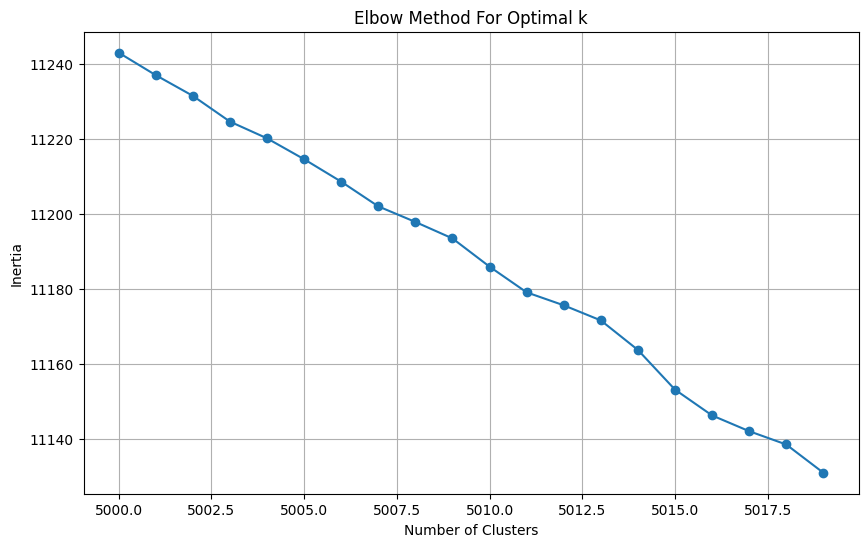

In [171]:

inertia_values = []
cluster_range = range(5000, 5020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_clean_en_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_clean_en_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [66]:
df_clustering.head()

,name,name_length,clean_name,noun_id,en_noun,dual_noun,clean_en_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,38,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan dewasa polos,gamis pria dewasa jubah pakistan polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,11,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel wisuda souvenir,buket bunga
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,10,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra fit new kaca lampu sein d...,mika motor
3,Blazer wanita jumbo big size stik balik / plus...,24,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik,blazer wanita jumbo size stik balik plus outer,blazer wanita stik balik
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...


There is a small improvement from clustering using text filtered to include only English nouns and by removing unrelated words, but the silhouette score is still low. This may be due to important words being removed during filtering, or unrelated words still being present because they were detected as NOUN or PROPN.

In [68]:
df_clustering.to_csv("data/clean/clean_dataset.csv", index=False)

#### Clustering using Flair POS

The code for training your own POS model using Flair is in the *train_pos_flair.ipynb* file located in the additional folder.
I trained two POS models: POS ID Only and POS ID + EN.

In [2]:
new_df = pd.read_csv("data/clean/clean_dataset.csv")
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8061 non-null   object
 1   name_length    8061 non-null   int64 
 2   clean_name     8061 non-null   object
 3   noun_id        8061 non-null   object
 4   en_noun        8061 non-null   object
 5   dual_noun      8061 non-null   object
 6   clean_en_noun  8060 non-null   object
dtypes: int64(1), object(6)
memory usage: 441.0+ KB


In [3]:
new_df.head()

,name,name_length,clean_name,noun_id,en_noun,dual_noun,clean_en_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,38,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan dewasa polos,gamis pria dewasa jubah pakistan polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,11,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel wisuda souvenir,buket bunga
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,10,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra fit new kaca lampu sein d...,mika motor
3,Blazer wanita jumbo big size stik balik / plus...,24,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik,blazer wanita jumbo size stik balik plus outer,blazer wanita stik balik
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...


#### FLAIR POS ID+EN

In [20]:
from flair.data import Sentence
from flair.models import SequenceTagger

tag_pos = SequenceTagger.load('resources/taggers/stacked-upos-en/best-model.pt')

2024-12-23 20:29:03,540 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


In [21]:
def extract_noun_custom(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        sentence = Sentence(cleaned_text)
        tag_pos.predict(sentence)

        filtered_words = [token.text for token in sentence if token.get_label('upos').value in ['NOUN', 'PROPN']]
        return ' '.join(filtered_words)
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''
    
new_df['custom_noun'] = new_df['name'].apply(extract_noun_custom)
new_df.head()

,name,name_length,clean_name,noun_id,en_noun,dual_noun,clean_en_noun,custom_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,38,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan dewasa polos,gamis pria dewasa jubah pakistan polos,pria dewasa jubah polos
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,11,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel bunga wisuda bunga so...
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,10,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra kaca lampu sein dpn motor...
3,Blazer wanita jumbo big size stik balik / plus...,24,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik,blazer wanita jumbo size stik balik plus outer,blazer wanita stik balik,blazer wanita jumbo size stik balik size outer
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,69,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8061 non-null   object
 1   name_length    8061 non-null   int64 
 2   clean_name     8061 non-null   object
 3   noun_id        8061 non-null   object
 4   en_noun        8061 non-null   object
 5   dual_noun      8061 non-null   object
 6   clean_en_noun  8060 non-null   object
 7   custom_noun    8061 non-null   object
dtypes: int64(1), object(7)
memory usage: 503.9+ KB


In [40]:
new_df['name_length'] = new_df['custom_noun'].apply(len)
new_df['name_length'].describe()

count    8061.000000
mean       43.875698
std        18.424574
min         2.000000
25%        32.000000
50%        44.000000
75%        54.000000
max       231.000000
Name: name_length, dtype: float64

In [39]:
new_df.loc[new_df['name_length'] == 0, 'custom_noun'] = new_df['clean_name']

#### FLAIR POS ID ONLY

In [28]:
tag_pos_id = SequenceTagger.load('resources/taggers/stacked-upos/best-model.pt')

2024-12-23 20:31:06,630 SequenceTagger predicts: Dictionary with 19 tags: NOUN, PROPN, PUNCT, VERB, ADP, PRON, ADJ, NUM, DET, CCONJ, ADV, AUX, SCONJ, PART, SYM, X, INTJ, <START>, <STOP>


In [29]:
def extract_noun_custom(text):
    try:
        tokens = re.split(r'[^\w]+', text.lower())
        cleaned_text = ' '.join(filter(None, tokens))
        
        sentence = Sentence(cleaned_text)
        tag_pos_id.predict(sentence)

        filtered_words = [token.text for token in sentence if token.get_label('upos').value in ['NOUN', 'PROPN']]
        return ' '.join(filtered_words)
    except Exception as e:
        print(f"Error processing text: {text}. Exception: {e}")
        return ''
    
new_df['custom_id_noun'] = new_df['name'].apply(extract_noun_custom)
new_df.head()

,name,name_length,clean_name,noun_id,en_noun,dual_noun,clean_en_noun,custom_noun,custom_id_noun
0,Gamis Pria Dewasa Premium / Jubah Pakistan Polos,23,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan,gamis pria dewasa premium jubah pakistan polos,gamis pria premium jubah pakistan dewasa polos,gamis pria dewasa jubah pakistan polos,pria dewasa jubah polos,gamis pria jubah pakistan
1,Buket Bunga Mawar Flanel / Bunga wisuda / Bung...,52,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel wisuda souvenir,buket bunga,buket bunga mawar flanel bunga wisuda bunga so...,buket bunga mawar flanel bunga wisuda bunga so...
2,Mika Sen Depan Supra Fit New Kaca Lampu Sein D...,58,mika sen depan supra fit new kaca lampu sein d...,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra fit new kaca lampu sein d...,mika motor,mika sen depan supra kaca lampu sein dpn motor...,mika sen depan supra new kaca lampu sein dpn m...
3,Blazer wanita jumbo big size stik balik / plus...,46,blazer wanita jumbo big size stik balik plus s...,blazer wanita jumbo size stik balik plus outer,blazer wanita jumbo size stik balik,blazer wanita jumbo size stik balik plus outer,blazer wanita stik balik,blazer wanita jumbo size stik balik size outer,blazer wanita jumbo big size stik balik plus
4,Buku Ilmu Sosial Budaya Dasar Perspektif Baru ...,0,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,buku ilmu sosial budaya perspektif kesadaran ani,buku ilmu sosial budaya dasar perspektif baru ...,,buku ilmu sosial budaya perspektif kesadaran ani


In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8061 entries, 0 to 8060
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            8061 non-null   object
 1   name_length     8061 non-null   int64 
 2   clean_name      8061 non-null   object
 3   noun_id         8061 non-null   object
 4   en_noun         8061 non-null   object
 5   dual_noun       8061 non-null   object
 6   clean_en_noun   8060 non-null   object
 7   custom_noun     8061 non-null   object
 8   custom_id_noun  8061 non-null   object
dtypes: int64(1), object(8)
memory usage: 566.9+ KB


In [36]:
new_df['name_length'] = new_df['custom_id_noun'].apply(len)
new_df['name_length'].describe()

count    8061.000000
mean       48.461977
std        18.838683
min         4.000000
25%        37.000000
50%        48.000000
75%        57.000000
max       234.000000
Name: name_length, dtype: float64

In [35]:
new_df.loc[new_df['name_length'] == 0, 'custom_id_noun'] = new_df['clean_name']

#### Clustering Using Text Filtered for NOUN and PROPN with Flair POS

In [41]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2', device="cuda")

In [42]:
custom_noun = model.encode(new_df['custom_noun'].tolist(), convert_to_numpy=True, batch_size=32)
X_custom_noun = np.vstack(list(custom_noun))

K=2, Silhouette Score=0.05563357099890709
K=3, Silhouette Score=0.03958898037672043
K=4, Silhouette Score=0.03645569086074829
K=5, Silhouette Score=0.03523020073771477
K=6, Silhouette Score=0.030573854222893715
K=7, Silhouette Score=0.03450800105929375
K=8, Silhouette Score=0.03761353716254234
K=9, Silhouette Score=0.037410203367471695
K=10, Silhouette Score=0.039503682404756546
K=11, Silhouette Score=0.04050946980714798
K=12, Silhouette Score=0.041176628321409225
K=13, Silhouette Score=0.03031003288924694
K=14, Silhouette Score=0.03220147639513016
K=15, Silhouette Score=0.03205587714910507
K=16, Silhouette Score=0.03615555912256241
K=17, Silhouette Score=0.03648049011826515
K=18, Silhouette Score=0.032193586230278015
K=19, Silhouette Score=0.0327889584004879


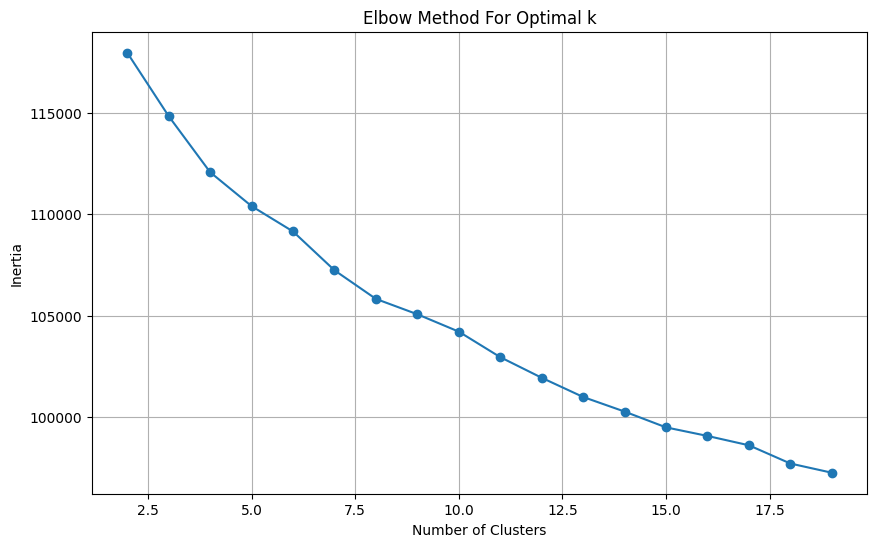

In [43]:
inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=102, Silhouette Score=0.03738705441355705
K=103, Silhouette Score=0.03865063935518265
K=104, Silhouette Score=0.03818675875663757
K=105, Silhouette Score=0.038864266127347946
K=106, Silhouette Score=0.03934201970696449
K=107, Silhouette Score=0.040040213614702225
K=108, Silhouette Score=0.03933929651975632
K=109, Silhouette Score=0.04131064563989639
K=110, Silhouette Score=0.0412125401198864
K=111, Silhouette Score=0.039715372025966644
K=112, Silhouette Score=0.038650285452604294
K=113, Silhouette Score=0.0408451184630394
K=114, Silhouette Score=0.04031086713075638
K=115, Silhouette Score=0.036817170679569244
K=116, Silhouette Score=0.037319719791412354
K=117, Silhouette Score=0.03866204991936684
K=118, Silhouette Score=0.038355570286512375
K=119, Silhouette Score=0.037628110498189926


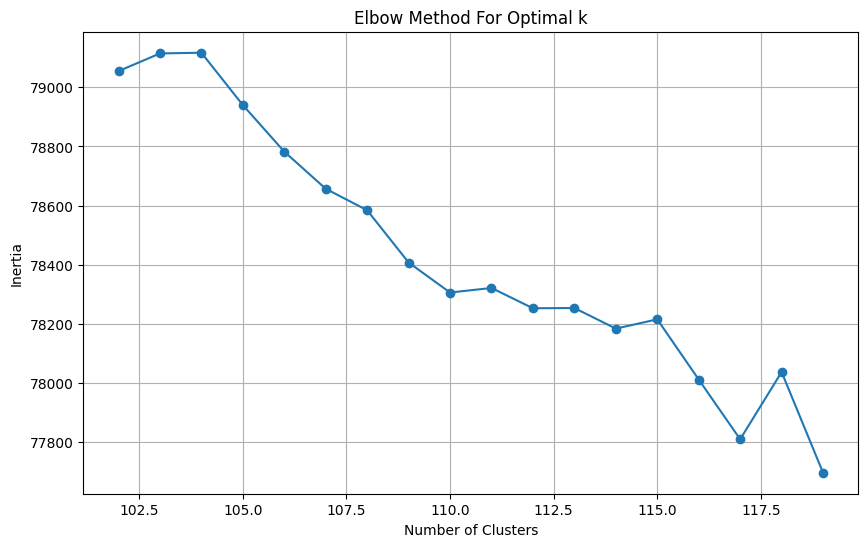

In [44]:
inertia_values = []
cluster_range = range(102, 120)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1002, Silhouette Score=0.047639865428209305
K=1003, Silhouette Score=0.04771020635962486
K=1004, Silhouette Score=0.04768902808427811
K=1005, Silhouette Score=0.04768986999988556
K=1006, Silhouette Score=0.04774266853928566
K=1007, Silhouette Score=0.04773665592074394
K=1008, Silhouette Score=0.04772559925913811
K=1009, Silhouette Score=0.0477294884622097
K=1010, Silhouette Score=0.04776144027709961
K=1011, Silhouette Score=0.048103537410497665
K=1012, Silhouette Score=0.04813264310359955
K=1013, Silhouette Score=0.04821295663714409
K=1014, Silhouette Score=0.04853584244847298
K=1015, Silhouette Score=0.04860994592308998
K=1016, Silhouette Score=0.04864062741398811
K=1017, Silhouette Score=0.04862546920776367
K=1018, Silhouette Score=0.048681583255529404
K=1019, Silhouette Score=0.04876798391342163


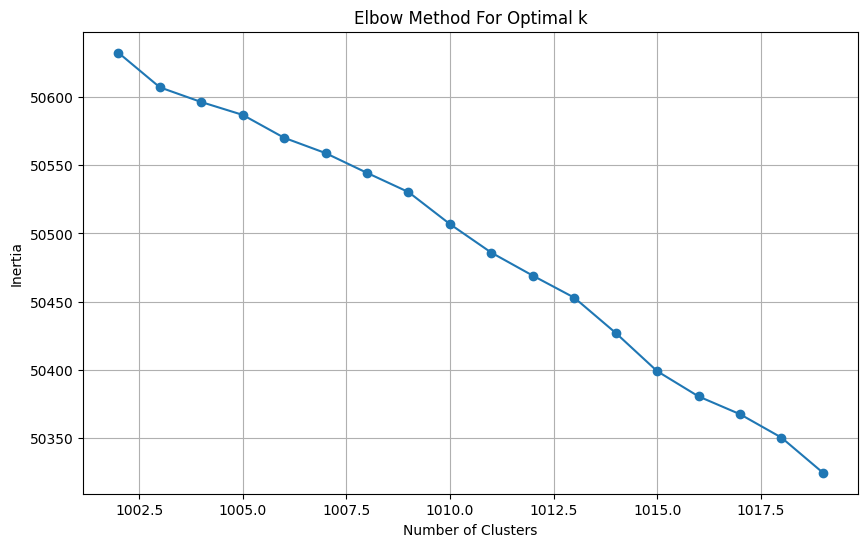

In [45]:
inertia_values = []
cluster_range = range(1002, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2002, Silhouette Score=0.050929632037878036
K=2003, Silhouette Score=0.051190074533224106
K=2004, Silhouette Score=0.05124092847108841
K=2005, Silhouette Score=0.05126115679740906
K=2006, Silhouette Score=0.051277585327625275
K=2007, Silhouette Score=0.05127264931797981
K=2008, Silhouette Score=0.051236823201179504
K=2009, Silhouette Score=0.051347702741622925
K=2010, Silhouette Score=0.0513136126101017
K=2011, Silhouette Score=0.05134681612253189
K=2012, Silhouette Score=0.05135151743888855
K=2013, Silhouette Score=0.05119607225060463
K=2014, Silhouette Score=0.051244113594293594
K=2015, Silhouette Score=0.05125722661614418
K=2016, Silhouette Score=0.05127988010644913
K=2017, Silhouette Score=0.05127735063433647
K=2018, Silhouette Score=0.05127629265189171
K=2019, Silhouette Score=0.051064375787973404


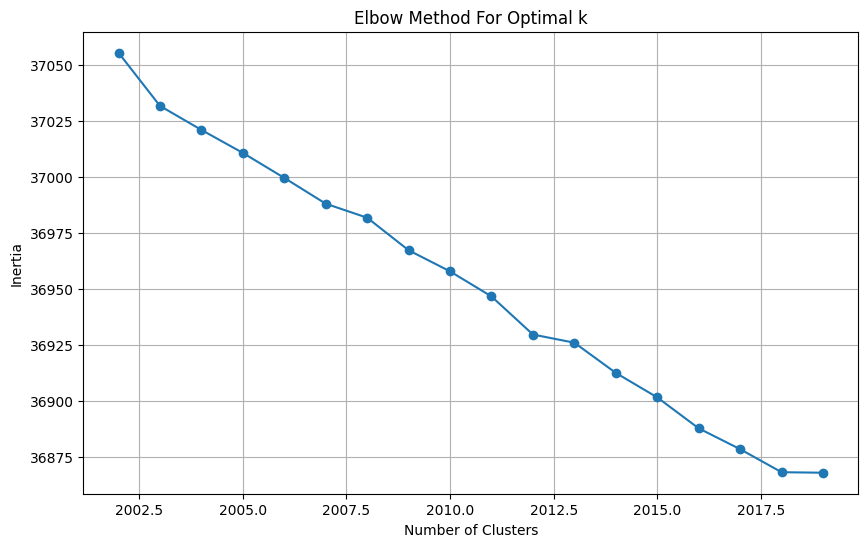

In [46]:
inertia_values = []
cluster_range = range(2002, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

In [47]:
custom_id_noun = model.encode(new_df['custom_id_noun'].tolist(), convert_to_numpy=True, batch_size=32)
X_custom_id_noun = np.vstack(list(custom_id_noun))

K=2, Silhouette Score=0.05569833889603615
K=3, Silhouette Score=0.041237104684114456
K=4, Silhouette Score=0.037093572318553925
K=5, Silhouette Score=0.035106755793094635
K=6, Silhouette Score=0.034382373094558716
K=7, Silhouette Score=0.03795379772782326
K=8, Silhouette Score=0.037897706031799316
K=9, Silhouette Score=0.03852284327149391
K=10, Silhouette Score=0.03881293162703514
K=11, Silhouette Score=0.03910891339182854
K=12, Silhouette Score=0.03955335542559624
K=13, Silhouette Score=0.033685438334941864
K=14, Silhouette Score=0.028591452166438103
K=15, Silhouette Score=0.029415298253297806
K=16, Silhouette Score=0.02817799337208271
K=17, Silhouette Score=0.028507264330983162
K=18, Silhouette Score=0.02751951478421688
K=19, Silhouette Score=0.028905458748340607


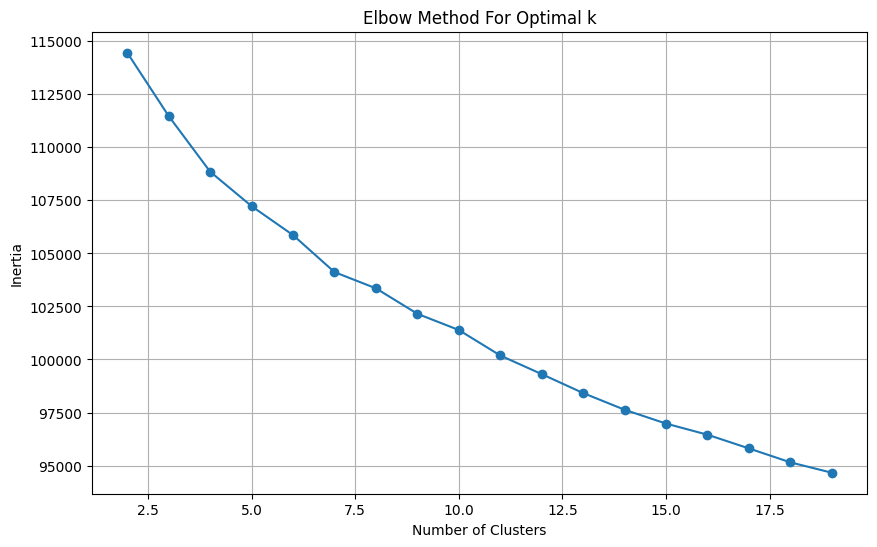

In [48]:
inertia_values = []
cluster_range = range(2, 20)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_id_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_id_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=102, Silhouette Score=0.028869008645415306
K=103, Silhouette Score=0.03318902477622032
K=104, Silhouette Score=0.032417602837085724
K=105, Silhouette Score=0.0326734259724617
K=106, Silhouette Score=0.03394194319844246
K=107, Silhouette Score=0.03466139733791351
K=108, Silhouette Score=0.033470530062913895
K=109, Silhouette Score=0.03143049031496048
K=110, Silhouette Score=0.03436930850148201
K=111, Silhouette Score=0.03284699469804764
K=112, Silhouette Score=0.0343339629471302
K=113, Silhouette Score=0.034628067165613174
K=114, Silhouette Score=0.0379025936126709
K=115, Silhouette Score=0.03563005477190018
K=116, Silhouette Score=0.039042189717292786
K=117, Silhouette Score=0.03541933000087738
K=118, Silhouette Score=0.035491131246089935
K=119, Silhouette Score=0.036954253911972046


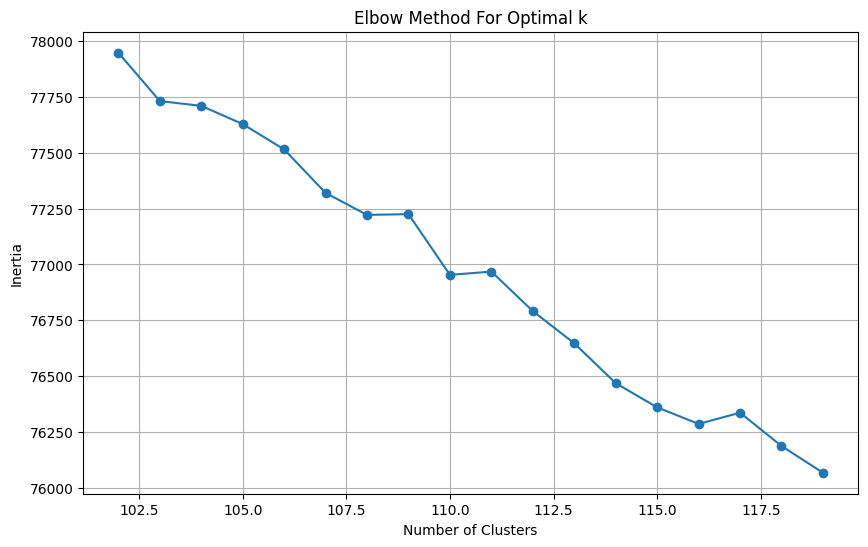

In [49]:
inertia_values = []
cluster_range = range(102, 120)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_id_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_id_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=1002, Silhouette Score=0.05060447379946709
K=1003, Silhouette Score=0.0506146140396595
K=1004, Silhouette Score=0.05061831697821617
K=1005, Silhouette Score=0.050381965935230255
K=1006, Silhouette Score=0.050103507936000824
K=1007, Silhouette Score=0.05010303482413292
K=1008, Silhouette Score=0.05011442303657532
K=1009, Silhouette Score=0.05015449970960617
K=1010, Silhouette Score=0.05010855942964554
K=1011, Silhouette Score=0.0501125194132328
K=1012, Silhouette Score=0.049921777099370956
K=1013, Silhouette Score=0.050073664635419846
K=1014, Silhouette Score=0.050272732973098755
K=1015, Silhouette Score=0.050255581736564636
K=1016, Silhouette Score=0.05025973916053772
K=1017, Silhouette Score=0.05027463659644127
K=1018, Silhouette Score=0.050286125391721725
K=1019, Silhouette Score=0.05027865990996361


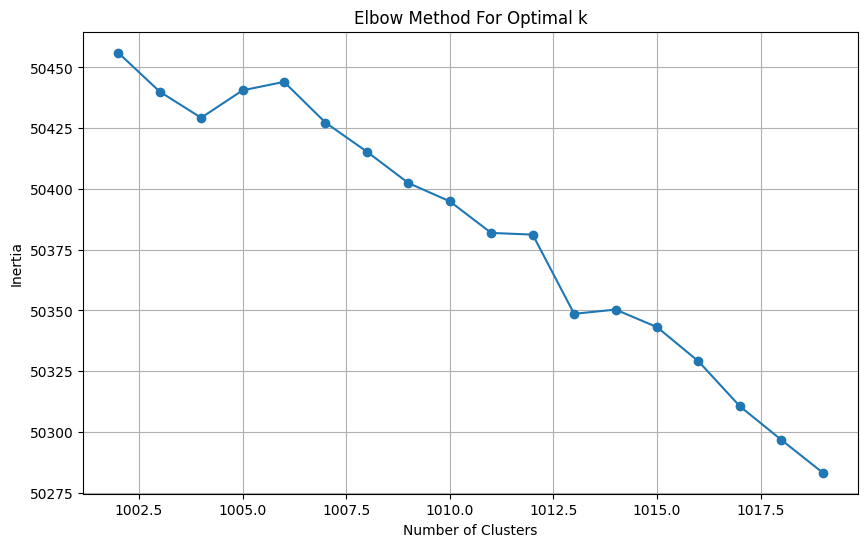

In [50]:
inertia_values = []
cluster_range = range(1002, 1020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_id_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_id_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

K=2002, Silhouette Score=0.05432974919676781
K=2003, Silhouette Score=0.05438537895679474
K=2004, Silhouette Score=0.054404471069574356
K=2005, Silhouette Score=0.05417358875274658
K=2006, Silhouette Score=0.0542185939848423
K=2007, Silhouette Score=0.054212018847465515
K=2008, Silhouette Score=0.054283030331134796
K=2009, Silhouette Score=0.05433182045817375
K=2010, Silhouette Score=0.054475780576467514
K=2011, Silhouette Score=0.05449454486370087
K=2012, Silhouette Score=0.05451928451657295
K=2013, Silhouette Score=0.054527509957551956
K=2014, Silhouette Score=0.054537996649742126
K=2015, Silhouette Score=0.054545607417821884
K=2016, Silhouette Score=0.0545080341398716
K=2017, Silhouette Score=0.05451132357120514
K=2018, Silhouette Score=0.05450005829334259
K=2019, Silhouette Score=0.05460943281650543


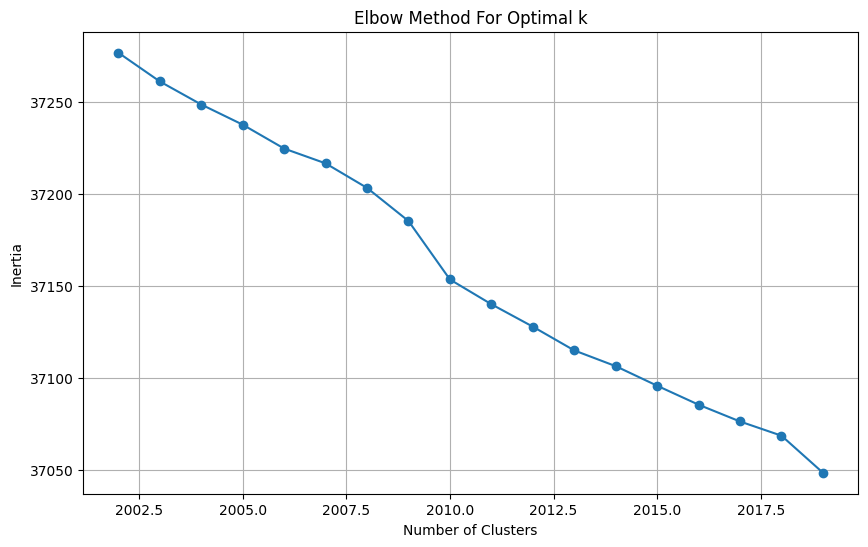

In [51]:
inertia_values = []
cluster_range = range(2002, 2020)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_custom_id_noun)
    inertia_values.append(kmeans.inertia_)
    sil_score = silhouette_score(X_custom_id_noun, labels)
    print(f"K={n_clusters}, Silhouette Score={sil_score}")

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

As we can see, the results using the Custom Flair POS do not perform better compared to the Stanza library. Therefore, I believe we need a more effective word filtering method rather than relying solely on POS tagging or basic preprocessing, as unnecessary words can interfere with the important ones during clustering.

**UPDATE!!!**

All the vectorization methods above use *SentenceTransformer*. However, in **main_pos_flair.ipynb** and **main_pos_stanza.ipynb**, I used *TF-IDF* to convert text into vector embeddings, and the results were significantly better than using *SentenceTransformer*. Additionally, in those two files, I performed parameter tuning on *TF-IDF*, particularly adjusting the **min_df** parameter, which further improved the model's performance. However, this tuning method has the potential to remove important words. In the future, I aim to explore the tuning process more deeply to ensure that important words are retained.